In [1]:
import numpy as np
import tensorflow as tf
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from matplotlib import pyplot as plt
import seaborn as sns
import scipy as sp
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input,Conv2D,MaxPooling2D,UpSampling2D, Dense
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras import regularizers
from tensorflow.keras import layers
from scipy.misc import derivative
import scipy.integrate as intg
import scipy as sp
from astroNN.nn.layers import MCDropout

### In this notebook, we use a compressed version of JLA compilation
#### First, we load the trained AutoEncoder

In [2]:
np.random.seed(0)

In [3]:
decoder = tf.keras.models.load_model('../models/decoderJLA.h5')
autoencoder = tf.keras.models.load_model('../models/autoencoderJLA.h5')
encoder = tf.keras.models.load_model('../models/encoderJLA.h5')
file2 = '/home/isidro/Documents/gitHub/misRepos/neuralCosmoReconstruction/data/jla_binned_distances_31nodes_v1.txt'
data = pd.read_csv(file2, names=['z', '$D_L$'], sep = " ", skiprows=3)

shuffle = [x for x in range(len(data.values)) if x%2 == 0]
comp = [x for x in range(len(data.values)) if x%2 ==1]
shuffle.extend(comp)


z = data.values[:,0][shuffle]
dl = data.values[:,1:][shuffle]

scalerdl = StandardScaler()
scalerdl.fit(dl.reshape(-1, 1))
dll = scalerdl.transform(dl.reshape((-1,1)))

avg_encoded = np.loadtxt('/home/isidro/Documents/gitHub/misRepos/neuralCosmoReconstruction/notebooks/avg_encoded.txt')

# FFNN

In [4]:
split = 0.8
ntrain = int(split * len(z))
indx = [ntrain]
z_train, z_test = np.split(z, indx)

scalerdl.fit(dl.reshape(-1, 1))
dll = scalerdl.transform(dl.reshape((-1,1)))
dl_train, dl_test = np.split(dll, indx)



In [5]:
def model2_dropout(input_z):
    efirst = Dense(100, activation='relu', input_shape=(1,))(input_z)
    x = MCDropout(0.01)(efirst)
    x = Dense(100, activation='relu')(efirst)
    x = MCDropout(0.01)(x)
    x = Dense(100, activation='relu')(x)
    x = MCDropout(0.01)(x)
    x = Dense(30, activation='relu')(x)
    x = MCDropout(0.01)(x)
    elast = Dense(1, activation='linear')(x)
    return elast

input_z = Input(shape = (1,))
neural_model2 = Model(input_z, model2_dropout(input_z))
neural_model2.compile(loss='mean_squared_error', optimizer = "adam")
neural_model2.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
dense (Dense)                (None, 100)               200       
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
MCDropout_2 (MCDropout)      (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
MCDropout_3 (MCDropout)      (None, 100)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 30)                3030  

In [6]:
model2_train = neural_model2.fit(z_train, dl_train, batch_size=1,
                                    epochs=10000,verbose=1,
                                    validation_data=(z_test, dl_test))
#                                     callbacks=callbacks)

Epoch 1/10000
24/24 [==============================] - 1s 28ms/step - loss: 0.9220 - val_loss: 0.6102
Epoch 2/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.6393 - val_loss: 0.1931
Epoch 3/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.5638 - val_loss: 0.0646
Epoch 4/10000
24/24 [==============================] - 0s 5ms/step - loss: 0.3645 - val_loss: 0.0812
Epoch 5/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.1793 - val_loss: 0.0507
Epoch 6/10000
24/24 [==============================] - 0s 5ms/step - loss: 0.1109 - val_loss: 0.0101
Epoch 7/10000
24/24 [==============================] - 0s 5ms/step - loss: 0.1260 - val_loss: 0.0210
Epoch 8/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0661 - val_loss: 0.0535
Epoch 9/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.1142 - val_loss: 0.0689
Epoch 10/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0982 - val_l

24/24 [==============================] - 0s 3ms/step - loss: 0.0112 - val_loss: 0.0126
Epoch 82/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0076 - val_loss: 0.0062
Epoch 83/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0104 - val_loss: 0.0178
Epoch 84/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0172 - val_loss: 0.0051
Epoch 85/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0200 - val_loss: 0.0055
Epoch 86/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0635 - val_loss: 0.0091
Epoch 87/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0156 - val_loss: 0.0264
Epoch 88/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0395 - val_loss: 0.0098
Epoch 89/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0122 - val_loss: 0.0032
Epoch 90/10000
24/24 [==============================] - 0s 5ms/step - loss: 0.0088 - val_loss: 0.

Epoch 161/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0151 - val_loss: 0.0026
Epoch 162/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0084 - val_loss: 0.0162
Epoch 163/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0057 - val_loss: 0.0097
Epoch 164/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0093 - val_loss: 0.0047
Epoch 165/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0279 - val_loss: 0.0099
Epoch 166/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0182 - val_loss: 3.1645e-04
Epoch 167/10000
24/24 [==============================] - 0s 5ms/step - loss: 0.0151 - val_loss: 0.0168
Epoch 168/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0106 - val_loss: 0.0056
Epoch 169/10000
24/24 [==============================] - 0s 5ms/step - loss: 0.0089 - val_loss: 0.0024
Epoch 170/10000
24/24 [==============================] - 0s 6ms/step 

24/24 [==============================] - 0s 3ms/step - loss: 0.0108 - val_loss: 0.0119
Epoch 241/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0079 - val_loss: 0.0234
Epoch 242/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0539 - val_loss: 0.0032
Epoch 243/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0037 - val_loss: 0.0152
Epoch 244/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0063 - val_loss: 0.0205
Epoch 245/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0027 - val_loss: 0.0050
Epoch 246/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0061 - val_loss: 0.0137
Epoch 247/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0083 - val_loss: 8.9167e-04
Epoch 248/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0102 - val_loss: 0.0016
Epoch 249/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0128 -

24/24 [==============================] - 0s 4ms/step - loss: 0.0077 - val_loss: 0.0039
Epoch 320/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0147 - val_loss: 0.0041
Epoch 321/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0082 - val_loss: 0.0018
Epoch 322/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0145 - val_loss: 0.0100
Epoch 323/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0079 - val_loss: 0.0087
Epoch 324/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0074 - val_loss: 0.0215
Epoch 325/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0195 - val_loss: 0.0108
Epoch 326/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0113 - val_loss: 0.0329
Epoch 327/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0201 - val_loss: 0.0133
Epoch 328/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0126 - val

24/24 [==============================] - 0s 7ms/step - loss: 0.0135 - val_loss: 0.0851
Epoch 399/10000
24/24 [==============================] - 0s 7ms/step - loss: 0.0257 - val_loss: 0.0097
Epoch 400/10000
24/24 [==============================] - 0s 10ms/step - loss: 0.0083 - val_loss: 0.0035
Epoch 401/10000
24/24 [==============================] - 0s 7ms/step - loss: 0.0058 - val_loss: 0.0012
Epoch 402/10000
24/24 [==============================] - 0s 8ms/step - loss: 0.0073 - val_loss: 0.0028
Epoch 403/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0134 - val_loss: 0.0019
Epoch 404/10000
24/24 [==============================] - 0s 5ms/step - loss: 0.0027 - val_loss: 0.0039
Epoch 405/10000
24/24 [==============================] - 0s 6ms/step - loss: 0.0157 - val_loss: 0.0042
Epoch 406/10000
24/24 [==============================] - 0s 5ms/step - loss: 0.0099 - val_loss: 0.0104
Epoch 407/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0049 - va

24/24 [==============================] - 0s 3ms/step - loss: 0.0024 - val_loss: 0.0039
Epoch 478/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0138 - val_loss: 0.0093
Epoch 479/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0075 - val_loss: 0.0266
Epoch 480/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0263 - val_loss: 0.0106
Epoch 481/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0110 - val_loss: 0.0036
Epoch 482/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0104 - val_loss: 0.0057
Epoch 483/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0071 - val_loss: 0.0242
Epoch 484/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0060 - val_loss: 0.0016
Epoch 485/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0055 - val_loss: 0.0221
Epoch 486/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0053 - val

24/24 [==============================] - 0s 7ms/step - loss: 0.0090 - val_loss: 0.0091
Epoch 557/10000
24/24 [==============================] - 0s 7ms/step - loss: 0.0056 - val_loss: 0.0035
Epoch 558/10000
24/24 [==============================] - 0s 7ms/step - loss: 0.0086 - val_loss: 9.2982e-04
Epoch 559/10000
24/24 [==============================] - 0s 8ms/step - loss: 0.0111 - val_loss: 0.0153
Epoch 560/10000
24/24 [==============================] - 0s 7ms/step - loss: 0.0084 - val_loss: 0.0139
Epoch 561/10000
24/24 [==============================] - 0s 7ms/step - loss: 0.0093 - val_loss: 0.0153
Epoch 562/10000
24/24 [==============================] - 0s 7ms/step - loss: 0.0053 - val_loss: 6.4790e-04
Epoch 563/10000
24/24 [==============================] - 0s 7ms/step - loss: 0.0028 - val_loss: 0.0052
Epoch 564/10000
24/24 [==============================] - 0s 7ms/step - loss: 0.0037 - val_loss: 0.0018
Epoch 565/10000
24/24 [==============================] - 0s 9ms/step - loss: 0.00

24/24 [==============================] - 0s 6ms/step - loss: 0.0019 - val_loss: 0.0046
Epoch 636/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0083 - val_loss: 0.0160
Epoch 637/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0051 - val_loss: 0.0073
Epoch 638/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0059 - val_loss: 0.0051
Epoch 639/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0019 - val_loss: 0.0014
Epoch 640/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0096 - val_loss: 0.0036
Epoch 641/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0092 - val_loss: 0.0081
Epoch 642/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0040 - val_loss: 0.0083
Epoch 643/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0038 - val_loss: 0.0022
Epoch 644/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0050 - val

24/24 [==============================] - 0s 3ms/step - loss: 0.0100 - val_loss: 0.0073
Epoch 715/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0030 - val_loss: 0.0067
Epoch 716/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0056 - val_loss: 0.0079
Epoch 717/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0069 - val_loss: 0.0018
Epoch 718/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0096 - val_loss: 0.0288
Epoch 719/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0056 - val_loss: 0.0266
Epoch 720/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0179 - val_loss: 0.0132
Epoch 721/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0029 - val_loss: 0.0121
Epoch 722/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0068 - val_loss: 0.0031
Epoch 723/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0066 - val

24/24 [==============================] - 0s 3ms/step - loss: 0.0045 - val_loss: 0.0062
Epoch 794/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0017 - val_loss: 9.4733e-04
Epoch 795/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0055 - val_loss: 0.0093
Epoch 796/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0013 - val_loss: 0.0029
Epoch 797/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0017 - val_loss: 0.0056
Epoch 798/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0012 - val_loss: 0.0064
Epoch 799/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0154 - val_loss: 0.0033
Epoch 800/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0157 - val_loss: 0.0098
Epoch 801/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0085 - val_loss: 0.0112
Epoch 802/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0065 -

24/24 [==============================] - 0s 2ms/step - loss: 0.0066 - val_loss: 0.0023
Epoch 873/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0073 - val_loss: 0.0021
Epoch 874/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0043 - val_loss: 8.4813e-04
Epoch 875/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0010 - val_loss: 0.0025
Epoch 876/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0075 - val_loss: 0.0037
Epoch 877/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0041 - val_loss: 0.0052
Epoch 878/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0059 - val_loss: 0.0049
Epoch 879/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0042 - val_loss: 0.0011
Epoch 880/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0082 - val_loss: 0.0018
Epoch 881/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0083 -

24/24 [==============================] - 0s 4ms/step - loss: 0.0208 - val_loss: 0.0027
Epoch 952/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0030 - val_loss: 0.0035
Epoch 953/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0102 - val_loss: 0.0025
Epoch 954/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0056 - val_loss: 0.0087
Epoch 955/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0039 - val_loss: 0.0158
Epoch 956/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0070 - val_loss: 0.0159
Epoch 957/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0076 - val_loss: 0.0039
Epoch 958/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0041 - val_loss: 3.8326e-04
Epoch 959/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0060 - val_loss: 0.0036
Epoch 960/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0078 -

Epoch 1030/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0069 - val_loss: 0.0223
Epoch 1031/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0137 - val_loss: 0.0078
Epoch 1032/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0061 - val_loss: 0.0167
Epoch 1033/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0094 - val_loss: 0.0115
Epoch 1034/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0098 - val_loss: 4.3985e-04
Epoch 1035/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0040 - val_loss: 9.1649e-04
Epoch 1036/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0047 - val_loss: 0.0059
Epoch 1037/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0031 - val_loss: 0.0054
Epoch 1038/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0022 - val_loss: 0.0048
Epoch 1039/10000
24/24 [==============================] 

24/24 [==============================] - 0s 3ms/step - loss: 0.0074 - val_loss: 0.0068
Epoch 1109/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0174 - val_loss: 0.0011
Epoch 1110/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0114 - val_loss: 0.0082
Epoch 1111/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0065 - val_loss: 0.0039
Epoch 1112/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0065 - val_loss: 0.0025
Epoch 1113/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0043 - val_loss: 0.0048
Epoch 1114/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0038 - val_loss: 0.0308
Epoch 1115/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0066 - val_loss: 0.0032
Epoch 1116/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0034 - val_loss: 0.0019
Epoch 1117/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0

Epoch 1187/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0019 - val_loss: 0.0020
Epoch 1188/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0054 - val_loss: 0.0014
Epoch 1189/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0026 - val_loss: 0.0011
Epoch 1190/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0082 - val_loss: 0.0136
Epoch 1191/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0096 - val_loss: 0.0011
Epoch 1192/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0083 - val_loss: 0.0029
Epoch 1193/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0084 - val_loss: 0.0050
Epoch 1194/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0035 - val_loss: 0.0026
Epoch 1195/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0020 - val_loss: 0.0055
Epoch 1196/10000
24/24 [==============================] - 0s 4ms

24/24 [==============================] - 0s 4ms/step - loss: 0.0021 - val_loss: 1.4817e-04
Epoch 1266/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0012 - val_loss: 0.0013
Epoch 1267/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0016 - val_loss: 0.0016
Epoch 1268/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0129 - val_loss: 0.0069
Epoch 1269/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0059 - val_loss: 0.0047
Epoch 1270/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0016 - val_loss: 0.0033
Epoch 1271/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0041 - val_loss: 0.0054
Epoch 1272/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0032 - val_loss: 0.0114
Epoch 1273/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0322 - val_loss: 0.0021
Epoch 1274/10000
24/24 [==============================] - 0s 4ms/step - loss:

24/24 [==============================] - 0s 4ms/step - loss: 0.0043 - val_loss: 0.0022
Epoch 1344/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0039 - val_loss: 0.0056
Epoch 1345/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0038 - val_loss: 0.0056
Epoch 1346/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0038 - val_loss: 0.0114
Epoch 1347/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0052 - val_loss: 0.0060
Epoch 1348/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0069 - val_loss: 0.0028
Epoch 1349/10000
24/24 [==============================] - 0s 5ms/step - loss: 0.0021 - val_loss: 0.0059
Epoch 1350/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0026 - val_loss: 0.0077
Epoch 1351/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0015 - val_loss: 0.0024
Epoch 1352/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0

24/24 [==============================] - 0s 3ms/step - loss: 0.0071 - val_loss: 0.0149
Epoch 1422/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0077 - val_loss: 0.0025
Epoch 1423/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0094 - val_loss: 0.0074
Epoch 1424/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0012 - val_loss: 0.0015
Epoch 1425/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0018 - val_loss: 0.0019
Epoch 1426/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0035 - val_loss: 0.0053
Epoch 1427/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0057 - val_loss: 0.0092
Epoch 1428/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0045 - val_loss: 0.0043
Epoch 1429/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0094 - val_loss: 0.0014
Epoch 1430/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0

Epoch 1500/10000
24/24 [==============================] - 0s 6ms/step - loss: 0.0078 - val_loss: 0.0019
Epoch 1501/10000
24/24 [==============================] - 0s 5ms/step - loss: 0.0079 - val_loss: 0.0055
Epoch 1502/10000
24/24 [==============================] - 0s 6ms/step - loss: 0.0040 - val_loss: 0.0015
Epoch 1503/10000
24/24 [==============================] - 0s 5ms/step - loss: 0.0026 - val_loss: 0.0015
Epoch 1504/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0017 - val_loss: 0.0036
Epoch 1505/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0087 - val_loss: 0.0035
Epoch 1506/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0037 - val_loss: 0.0024
Epoch 1507/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0032 - val_loss: 0.0025
Epoch 1508/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0039 - val_loss: 0.0049
Epoch 1509/10000
24/24 [==============================] - 0s 4ms

24/24 [==============================] - 0s 4ms/step - loss: 0.0039 - val_loss: 0.0024
Epoch 1579/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0044 - val_loss: 0.0162
Epoch 1580/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0117 - val_loss: 0.0106
Epoch 1581/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0066 - val_loss: 0.0080
Epoch 1582/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0070 - val_loss: 0.0027
Epoch 1583/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0163 - val_loss: 0.0038
Epoch 1584/10000
24/24 [==============================] - 0s 5ms/step - loss: 0.0080 - val_loss: 9.2650e-04
Epoch 1585/10000
24/24 [==============================] - 0s 5ms/step - loss: 0.0013 - val_loss: 0.0039
Epoch 1586/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0026 - val_loss: 0.0015
Epoch 1587/10000
24/24 [==============================] - 0s 3ms/step - loss:

Epoch 1657/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0051 - val_loss: 0.0024
Epoch 1658/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0054 - val_loss: 0.0097
Epoch 1659/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0040 - val_loss: 0.0034
Epoch 1660/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0101 - val_loss: 0.0021
Epoch 1661/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0030 - val_loss: 0.0052
Epoch 1662/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0028 - val_loss: 0.0021
Epoch 1663/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0063 - val_loss: 0.0050
Epoch 1664/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0102 - val_loss: 0.0021
Epoch 1665/10000
24/24 [==============================] - 0s 5ms/step - loss: 0.0030 - val_loss: 0.0060
Epoch 1666/10000
24/24 [==============================] - 0s 4ms

24/24 [==============================] - 0s 3ms/step - loss: 0.0086 - val_loss: 0.0025
Epoch 1736/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0028 - val_loss: 0.0027
Epoch 1737/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0061 - val_loss: 0.0122
Epoch 1738/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0031 - val_loss: 0.0085
Epoch 1739/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0067 - val_loss: 0.0062
Epoch 1740/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0045 - val_loss: 0.0233
Epoch 1741/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0057 - val_loss: 0.0015
Epoch 1742/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0030 - val_loss: 0.0041
Epoch 1743/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0039 - val_loss: 0.0018
Epoch 1744/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0

24/24 [==============================] - 0s 3ms/step - loss: 0.0020 - val_loss: 0.0014
Epoch 1814/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0064 - val_loss: 0.0027
Epoch 1815/10000
24/24 [==============================] - 0s 5ms/step - loss: 0.0024 - val_loss: 0.0046
Epoch 1816/10000
24/24 [==============================] - 0s 5ms/step - loss: 0.0016 - val_loss: 0.0039
Epoch 1817/10000
24/24 [==============================] - 0s 7ms/step - loss: 0.0022 - val_loss: 0.0027
Epoch 1818/10000
24/24 [==============================] - 0s 5ms/step - loss: 0.0069 - val_loss: 0.0022
Epoch 1819/10000
24/24 [==============================] - 0s 6ms/step - loss: 0.0112 - val_loss: 0.0019
Epoch 1820/10000
24/24 [==============================] - 0s 5ms/step - loss: 0.0040 - val_loss: 0.0098
Epoch 1821/10000
24/24 [==============================] - 0s 6ms/step - loss: 0.0042 - val_loss: 0.0018
Epoch 1822/10000
24/24 [==============================] - 0s 7ms/step - loss: 0.0

24/24 [==============================] - 0s 3ms/step - loss: 0.0040 - val_loss: 0.0038
Epoch 1892/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0036 - val_loss: 0.0016
Epoch 1893/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0024 - val_loss: 0.0045
Epoch 1894/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0022 - val_loss: 0.0057
Epoch 1895/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0035 - val_loss: 5.5479e-04
Epoch 1896/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0025 - val_loss: 0.0027
Epoch 1897/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0021 - val_loss: 0.0072
Epoch 1898/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0048 - val_loss: 0.0027
Epoch 1899/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0040 - val_loss: 0.0026
Epoch 1900/10000
24/24 [==============================] - 0s 3ms/step - loss:

24/24 [==============================] - 0s 4ms/step - loss: 0.0076 - val_loss: 7.6317e-04
Epoch 1970/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0028 - val_loss: 0.0063
Epoch 1971/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0097 - val_loss: 0.0034
Epoch 1972/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0044 - val_loss: 0.0034
Epoch 1973/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0035 - val_loss: 0.0032
Epoch 1974/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0065 - val_loss: 0.0067
Epoch 1975/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0095 - val_loss: 0.0086
Epoch 1976/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0038 - val_loss: 0.0048
Epoch 1977/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0046 - val_loss: 0.0041
Epoch 1978/10000
24/24 [==============================] - 0s 3ms/step - loss:

24/24 [==============================] - 0s 4ms/step - loss: 0.0071 - val_loss: 0.0025
Epoch 2048/10000
24/24 [==============================] - 0s 9ms/step - loss: 0.0039 - val_loss: 0.0040
Epoch 2049/10000
24/24 [==============================] - 0s 8ms/step - loss: 0.0063 - val_loss: 0.0076
Epoch 2050/10000
24/24 [==============================] - 0s 7ms/step - loss: 0.0124 - val_loss: 0.0073
Epoch 2051/10000
24/24 [==============================] - 0s 5ms/step - loss: 0.0103 - val_loss: 0.0033
Epoch 2052/10000
24/24 [==============================] - 0s 7ms/step - loss: 0.0051 - val_loss: 0.0082
Epoch 2053/10000
24/24 [==============================] - 0s 6ms/step - loss: 0.0168 - val_loss: 0.0032
Epoch 2054/10000
24/24 [==============================] - 0s 5ms/step - loss: 0.0093 - val_loss: 0.0036
Epoch 2055/10000
24/24 [==============================] - 0s 7ms/step - loss: 0.0031 - val_loss: 0.0058
Epoch 2056/10000
24/24 [==============================] - 0s 7ms/step - loss: 0.0

24/24 [==============================] - 0s 3ms/step - loss: 0.0087 - val_loss: 0.0075
Epoch 2126/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0031 - val_loss: 8.9337e-04
Epoch 2127/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0098 - val_loss: 0.0058
Epoch 2128/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0022 - val_loss: 0.0085
Epoch 2129/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0020 - val_loss: 2.7717e-04
Epoch 2130/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0025 - val_loss: 0.0046
Epoch 2131/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0022 - val_loss: 0.0040
Epoch 2132/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0045 - val_loss: 0.0016
Epoch 2133/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0036 - val_loss: 0.0042
Epoch 2134/10000
24/24 [==============================] - 0s 3ms/step - l

24/24 [==============================] - 0s 3ms/step - loss: 6.6367e-04 - val_loss: 0.0088
Epoch 2204/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0114 - val_loss: 0.0151
Epoch 2205/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0163 - val_loss: 0.0085
Epoch 2206/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0076 - val_loss: 0.0015
Epoch 2207/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0065 - val_loss: 0.0019
Epoch 2208/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0011 - val_loss: 0.0083
Epoch 2209/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0037 - val_loss: 0.0033
Epoch 2210/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0059 - val_loss: 0.0030
Epoch 2211/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0179 - val_loss: 6.7776e-04
Epoch 2212/10000
24/24 [==============================] - 0s 3ms/step - l

24/24 [==============================] - 0s 5ms/step - loss: 0.0047 - val_loss: 0.0056
Epoch 2282/10000
24/24 [==============================] - 0s 5ms/step - loss: 0.0032 - val_loss: 0.0053
Epoch 2283/10000
24/24 [==============================] - 0s 5ms/step - loss: 0.0054 - val_loss: 0.0014
Epoch 2284/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0087 - val_loss: 0.0050
Epoch 2285/10000
24/24 [==============================] - 0s 5ms/step - loss: 0.0100 - val_loss: 0.0017
Epoch 2286/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0012 - val_loss: 0.0049
Epoch 2287/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0045 - val_loss: 6.7067e-04
Epoch 2288/10000
24/24 [==============================] - 0s 4ms/step - loss: 9.7789e-04 - val_loss: 0.0160
Epoch 2289/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0029 - val_loss: 0.0030
Epoch 2290/10000
24/24 [==============================] - 0s 3ms/step - l

24/24 [==============================] - 0s 4ms/step - loss: 0.0055 - val_loss: 3.7404e-04
Epoch 2360/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0169 - val_loss: 0.0013
Epoch 2361/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0023 - val_loss: 0.0028
Epoch 2362/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0035 - val_loss: 0.0061
Epoch 2363/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0100 - val_loss: 0.0021
Epoch 2364/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0055 - val_loss: 0.0025
Epoch 2365/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0031 - val_loss: 0.0158
Epoch 2366/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0042 - val_loss: 0.0159
Epoch 2367/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0028 - val_loss: 0.0044
Epoch 2368/10000
24/24 [==============================] - 0s 4ms/step - loss:

24/24 [==============================] - 0s 5ms/step - loss: 0.0032 - val_loss: 0.0075
Epoch 2438/10000
24/24 [==============================] - 0s 5ms/step - loss: 0.0020 - val_loss: 0.0021
Epoch 2439/10000
24/24 [==============================] - 0s 5ms/step - loss: 0.0019 - val_loss: 0.0019
Epoch 2440/10000
24/24 [==============================] - 0s 5ms/step - loss: 0.0034 - val_loss: 0.0140
Epoch 2441/10000
24/24 [==============================] - 0s 5ms/step - loss: 0.0028 - val_loss: 0.0043
Epoch 2442/10000
24/24 [==============================] - 0s 5ms/step - loss: 0.0048 - val_loss: 0.0063
Epoch 2443/10000
24/24 [==============================] - 0s 5ms/step - loss: 0.0035 - val_loss: 0.0041
Epoch 2444/10000
24/24 [==============================] - 0s 5ms/step - loss: 9.3555e-04 - val_loss: 0.0023
Epoch 2445/10000
24/24 [==============================] - 0s 5ms/step - loss: 0.0040 - val_loss: 0.0054
Epoch 2446/10000
24/24 [==============================] - 0s 5ms/step - loss:

24/24 [==============================] - 0s 3ms/step - loss: 0.0027 - val_loss: 0.0033
Epoch 2516/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0063 - val_loss: 0.0012
Epoch 2517/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0018 - val_loss: 6.8239e-04
Epoch 2518/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0134 - val_loss: 0.0018
Epoch 2519/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0046 - val_loss: 0.0014
Epoch 2520/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0076 - val_loss: 0.0035
Epoch 2521/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0023 - val_loss: 0.0063
Epoch 2522/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0060 - val_loss: 0.0039
Epoch 2523/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0044 - val_loss: 0.0087
Epoch 2524/10000
24/24 [==============================] - 0s 3ms/step - loss:

24/24 [==============================] - 0s 4ms/step - loss: 0.0042 - val_loss: 0.0014
Epoch 2594/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0038 - val_loss: 0.0015
Epoch 2595/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0032 - val_loss: 0.0038
Epoch 2596/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0053 - val_loss: 0.0010
Epoch 2597/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0080 - val_loss: 0.0089
Epoch 2598/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0047 - val_loss: 0.0012
Epoch 2599/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0029 - val_loss: 0.0023
Epoch 2600/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0056 - val_loss: 5.8375e-04
Epoch 2601/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0013 - val_loss: 0.0062
Epoch 2602/10000
24/24 [==============================] - 0s 3ms/step - loss:

Epoch 2672/10000
24/24 [==============================] - 0s 5ms/step - loss: 0.0058 - val_loss: 0.0047
Epoch 2673/10000
24/24 [==============================] - 0s 5ms/step - loss: 0.0038 - val_loss: 0.0012
Epoch 2674/10000
24/24 [==============================] - 0s 5ms/step - loss: 0.0017 - val_loss: 0.0011
Epoch 2675/10000
24/24 [==============================] - 0s 5ms/step - loss: 0.0011 - val_loss: 0.0022
Epoch 2676/10000
24/24 [==============================] - 0s 5ms/step - loss: 0.0013 - val_loss: 0.0010
Epoch 2677/10000
24/24 [==============================] - 0s 5ms/step - loss: 0.0063 - val_loss: 0.0033
Epoch 2678/10000
24/24 [==============================] - 0s 5ms/step - loss: 0.0034 - val_loss: 0.0022
Epoch 2679/10000
24/24 [==============================] - 0s 5ms/step - loss: 0.0032 - val_loss: 0.0027
Epoch 2680/10000
24/24 [==============================] - 0s 5ms/step - loss: 0.0064 - val_loss: 0.0053
Epoch 2681/10000
24/24 [==============================] - 0s 5ms

24/24 [==============================] - 0s 4ms/step - loss: 0.0043 - val_loss: 0.0334
Epoch 2751/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0023 - val_loss: 8.5804e-04
Epoch 2752/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0036 - val_loss: 0.0071
Epoch 2753/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0027 - val_loss: 0.0038
Epoch 2754/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0027 - val_loss: 0.0028
Epoch 2755/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0040 - val_loss: 0.0040
Epoch 2756/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0133 - val_loss: 3.8182e-04
Epoch 2757/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0026 - val_loss: 0.0191
Epoch 2758/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0074 - val_loss: 0.0077
Epoch 2759/10000
24/24 [==============================] - 0s 3ms/step - l

24/24 [==============================] - 0s 3ms/step - loss: 0.0050 - val_loss: 0.0021
Epoch 2829/10000
24/24 [==============================] - 0s 3ms/step - loss: 8.6113e-04 - val_loss: 0.0026
Epoch 2830/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0019 - val_loss: 0.0041
Epoch 2831/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0088 - val_loss: 0.0023
Epoch 2832/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0065 - val_loss: 0.0099
Epoch 2833/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0043 - val_loss: 0.0034
Epoch 2834/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0033 - val_loss: 0.0032
Epoch 2835/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0036 - val_loss: 0.0032
Epoch 2836/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0022 - val_loss: 0.0013
Epoch 2837/10000
24/24 [==============================] - 0s 3ms/step - loss:

24/24 [==============================] - 0s 6ms/step - loss: 8.8119e-04 - val_loss: 3.2726e-04
Epoch 2907/10000
24/24 [==============================] - 0s 6ms/step - loss: 0.0048 - val_loss: 0.0024
Epoch 2908/10000
24/24 [==============================] - 0s 6ms/step - loss: 0.0015 - val_loss: 0.0025
Epoch 2909/10000
24/24 [==============================] - 0s 6ms/step - loss: 8.7403e-04 - val_loss: 7.5816e-04
Epoch 2910/10000
24/24 [==============================] - 0s 6ms/step - loss: 0.0020 - val_loss: 6.8909e-04
Epoch 2911/10000
24/24 [==============================] - 0s 5ms/step - loss: 0.0030 - val_loss: 0.0021
Epoch 2912/10000
24/24 [==============================] - 0s 5ms/step - loss: 0.0017 - val_loss: 0.0054
Epoch 2913/10000
24/24 [==============================] - 0s 5ms/step - loss: 0.0040 - val_loss: 0.0030
Epoch 2914/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0016 - val_loss: 0.0064
Epoch 2915/10000
24/24 [==============================] - 0s 

24/24 [==============================] - 0s 3ms/step - loss: 0.0044 - val_loss: 3.6993e-04
Epoch 2985/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0056 - val_loss: 0.0027
Epoch 2986/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0071 - val_loss: 1.5552e-04
Epoch 2987/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0032 - val_loss: 7.3510e-04
Epoch 2988/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0036 - val_loss: 0.0029
Epoch 2989/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0024 - val_loss: 0.0013
Epoch 2990/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0019 - val_loss: 0.0016
Epoch 2991/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0024 - val_loss: 0.0147
Epoch 2992/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0028 - val_loss: 0.0020
Epoch 2993/10000
24/24 [==============================] - 0s 3ms/step

24/24 [==============================] - 0s 3ms/step - loss: 0.0038 - val_loss: 0.0072
Epoch 3063/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0017 - val_loss: 0.0018
Epoch 3064/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0088 - val_loss: 0.0035
Epoch 3065/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0026 - val_loss: 9.6951e-04
Epoch 3066/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0014 - val_loss: 0.0019
Epoch 3067/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0085 - val_loss: 0.0029
Epoch 3068/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0030 - val_loss: 0.0018
Epoch 3069/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0038 - val_loss: 0.0021
Epoch 3070/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0057 - val_loss: 0.0013
Epoch 3071/10000
24/24 [==============================] - 0s 3ms/step - loss:

24/24 [==============================] - 0s 5ms/step - loss: 0.0031 - val_loss: 0.0039
Epoch 3141/10000
24/24 [==============================] - 0s 5ms/step - loss: 0.0069 - val_loss: 0.0023
Epoch 3142/10000
24/24 [==============================] - 0s 6ms/step - loss: 0.0021 - val_loss: 0.0023
Epoch 3143/10000
24/24 [==============================] - 0s 6ms/step - loss: 0.0024 - val_loss: 0.0051
Epoch 3144/10000
24/24 [==============================] - 0s 5ms/step - loss: 0.0050 - val_loss: 0.0027
Epoch 3145/10000
24/24 [==============================] - 0s 5ms/step - loss: 0.0049 - val_loss: 0.0098
Epoch 3146/10000
24/24 [==============================] - 0s 6ms/step - loss: 0.0045 - val_loss: 0.0102
Epoch 3147/10000
24/24 [==============================] - 0s 5ms/step - loss: 0.0049 - val_loss: 0.0092
Epoch 3148/10000
24/24 [==============================] - 0s 5ms/step - loss: 0.0060 - val_loss: 0.0215
Epoch 3149/10000
24/24 [==============================] - 0s 6ms/step - loss: 0.0

24/24 [==============================] - 0s 4ms/step - loss: 0.0017 - val_loss: 0.0096
Epoch 3219/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0054 - val_loss: 0.0031
Epoch 3220/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0056 - val_loss: 0.0045
Epoch 3221/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0069 - val_loss: 0.0050
Epoch 3222/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0040 - val_loss: 0.0041
Epoch 3223/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0033 - val_loss: 6.3490e-04
Epoch 3224/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0032 - val_loss: 9.8751e-04
Epoch 3225/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0090 - val_loss: 4.2851e-04
Epoch 3226/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0023 - val_loss: 0.0115
Epoch 3227/10000
24/24 [==============================] - 0s 3ms/step

24/24 [==============================] - 0s 3ms/step - loss: 0.0033 - val_loss: 0.0045
Epoch 3297/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0039 - val_loss: 0.0020
Epoch 3298/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0018 - val_loss: 0.0017
Epoch 3299/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0019 - val_loss: 0.0024
Epoch 3300/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0026 - val_loss: 0.0014
Epoch 3301/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0062 - val_loss: 0.0105
Epoch 3302/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0063 - val_loss: 0.0090
Epoch 3303/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0050 - val_loss: 0.0029
Epoch 3304/10000
24/24 [==============================] - 0s 4ms/step - loss: 8.2135e-04 - val_loss: 0.0057
Epoch 3305/10000
24/24 [==============================] - 0s 4ms/step - loss:

24/24 [==============================] - 0s 4ms/step - loss: 0.0019 - val_loss: 0.0057
Epoch 3375/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0036 - val_loss: 8.0422e-04
Epoch 3376/10000
24/24 [==============================] - 0s 5ms/step - loss: 0.0021 - val_loss: 0.0048
Epoch 3377/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0013 - val_loss: 0.0087
Epoch 3378/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0016 - val_loss: 0.0045
Epoch 3379/10000
24/24 [==============================] - 0s 5ms/step - loss: 0.0012 - val_loss: 0.0034
Epoch 3380/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0030 - val_loss: 9.8778e-04
Epoch 3381/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0040 - val_loss: 0.0051
Epoch 3382/10000
24/24 [==============================] - 0s 5ms/step - loss: 0.0013 - val_loss: 9.1144e-04
Epoch 3383/10000
24/24 [==============================] - 0s 5ms/step

24/24 [==============================] - 0s 3ms/step - loss: 0.0041 - val_loss: 0.0056
Epoch 3453/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0035 - val_loss: 0.0041
Epoch 3454/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0054 - val_loss: 0.0055
Epoch 3455/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0016 - val_loss: 0.0027
Epoch 3456/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0015 - val_loss: 0.0018
Epoch 3457/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0018 - val_loss: 0.0093
Epoch 3458/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0012 - val_loss: 0.0045
Epoch 3459/10000
24/24 [==============================] - 0s 5ms/step - loss: 0.0045 - val_loss: 0.0021
Epoch 3460/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0027 - val_loss: 0.0057
Epoch 3461/10000
24/24 [==============================] - 0s 5ms/step - loss: 0.0

24/24 [==============================] - 0s 3ms/step - loss: 0.0037 - val_loss: 0.0067
Epoch 3531/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0029 - val_loss: 7.8411e-04
Epoch 3532/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0065 - val_loss: 0.0021
Epoch 3533/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0048 - val_loss: 0.0044
Epoch 3534/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0096 - val_loss: 0.0038
Epoch 3535/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0059 - val_loss: 0.0320
Epoch 3536/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0100 - val_loss: 0.0225
Epoch 3537/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0083 - val_loss: 0.0147
Epoch 3538/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0047 - val_loss: 0.0056
Epoch 3539/10000
24/24 [==============================] - 0s 3ms/step - loss:

24/24 [==============================] - 0s 5ms/step - loss: 0.0047 - val_loss: 0.0072
Epoch 3609/10000
24/24 [==============================] - 0s 5ms/step - loss: 0.0114 - val_loss: 0.0031
Epoch 3610/10000
24/24 [==============================] - 0s 5ms/step - loss: 0.0042 - val_loss: 0.0056
Epoch 3611/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0098 - val_loss: 0.0017
Epoch 3612/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0054 - val_loss: 0.0113
Epoch 3613/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0057 - val_loss: 0.0013
Epoch 3614/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0030 - val_loss: 0.0091
Epoch 3615/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0068 - val_loss: 0.0051
Epoch 3616/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0038 - val_loss: 0.0038
Epoch 3617/10000
24/24 [==============================] - 0s 5ms/step - loss: 0.0

24/24 [==============================] - 0s 3ms/step - loss: 0.0035 - val_loss: 7.9937e-04
Epoch 3687/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0023 - val_loss: 0.0077
Epoch 3688/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0019 - val_loss: 6.1196e-04
Epoch 3689/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0032 - val_loss: 0.0024
Epoch 3690/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0065 - val_loss: 0.0013
Epoch 3691/10000
24/24 [==============================] - 0s 3ms/step - loss: 9.3459e-04 - val_loss: 0.0018
Epoch 3692/10000
24/24 [==============================] - 0s 2ms/step - loss: 9.5996e-04 - val_loss: 7.3460e-04
Epoch 3693/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0032 - val_loss: 0.0044
Epoch 3694/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0030 - val_loss: 0.0015
Epoch 3695/10000
24/24 [==============================] - 0s 

24/24 [==============================] - 0s 4ms/step - loss: 0.0101 - val_loss: 0.0036
Epoch 3765/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0061 - val_loss: 0.0070
Epoch 3766/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0036 - val_loss: 0.0016
Epoch 3767/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0022 - val_loss: 0.0041
Epoch 3768/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0047 - val_loss: 0.0081
Epoch 3769/10000
24/24 [==============================] - 0s 5ms/step - loss: 0.0049 - val_loss: 0.0064
Epoch 3770/10000
24/24 [==============================] - 0s 5ms/step - loss: 0.0073 - val_loss: 0.0028
Epoch 3771/10000
24/24 [==============================] - 0s 5ms/step - loss: 0.0040 - val_loss: 7.8397e-04
Epoch 3772/10000
24/24 [==============================] - 0s 5ms/step - loss: 0.0062 - val_loss: 8.8667e-04
Epoch 3773/10000
24/24 [==============================] - 0s 4ms/step - l

24/24 [==============================] - 0s 3ms/step - loss: 0.0029 - val_loss: 8.1764e-04
Epoch 3843/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0033 - val_loss: 5.7491e-04
Epoch 3844/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0048 - val_loss: 0.0063
Epoch 3845/10000
24/24 [==============================] - 0s 3ms/step - loss: 9.0598e-04 - val_loss: 0.0020
Epoch 3846/10000
24/24 [==============================] - 0s 3ms/step - loss: 7.4052e-04 - val_loss: 0.0043
Epoch 3847/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0034 - val_loss: 0.0011
Epoch 3848/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0057 - val_loss: 7.2939e-04
Epoch 3849/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0045 - val_loss: 4.2071e-04
Epoch 3850/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0059 - val_loss: 0.0170
Epoch 3851/10000
24/24 [==============================] -

24/24 [==============================] - 0s 3ms/step - loss: 0.0016 - val_loss: 7.1337e-04
Epoch 3921/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0032 - val_loss: 0.0015
Epoch 3922/10000
24/24 [==============================] - 0s 3ms/step - loss: 4.7292e-04 - val_loss: 8.9502e-04
Epoch 3923/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0012 - val_loss: 0.0027
Epoch 3924/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0053 - val_loss: 0.0241
Epoch 3925/10000
24/24 [==============================] - 0s 3ms/step - loss: 9.7707e-04 - val_loss: 3.4329e-04
Epoch 3926/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0021 - val_loss: 7.0602e-04
Epoch 3927/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0012 - val_loss: 0.0041
Epoch 3928/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0028 - val_loss: 0.0043
Epoch 3929/10000
24/24 [==============================] -

24/24 [==============================] - 0s 2ms/step - loss: 0.0036 - val_loss: 0.0032
Epoch 3999/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0022 - val_loss: 0.0016
Epoch 4000/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0021 - val_loss: 0.0067
Epoch 4001/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0027 - val_loss: 0.0224
Epoch 4002/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0020 - val_loss: 0.0044
Epoch 4003/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0013 - val_loss: 0.0053
Epoch 4004/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0033 - val_loss: 0.0032
Epoch 4005/10000
24/24 [==============================] - 0s 2ms/step - loss: 5.1689e-04 - val_loss: 2.6340e-04
Epoch 4006/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0038
Epoch 4007/10000
24/24 [==============================] - 0s 2ms/step - l

24/24 [==============================] - 0s 3ms/step - loss: 0.0041 - val_loss: 0.0075
Epoch 4077/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0025 - val_loss: 0.0037
Epoch 4078/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0056 - val_loss: 8.2813e-04
Epoch 4079/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0041 - val_loss: 5.5666e-04
Epoch 4080/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0019 - val_loss: 9.9351e-04
Epoch 4081/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0027 - val_loss: 0.0074
Epoch 4082/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0025 - val_loss: 0.0043
Epoch 4083/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0068 - val_loss: 0.0053
Epoch 4084/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0033 - val_loss: 5.6081e-04
Epoch 4085/10000
24/24 [==============================] - 0s 4ms/

24/24 [==============================] - 0s 2ms/step - loss: 0.0027 - val_loss: 0.0056
Epoch 4155/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0010
Epoch 4156/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0048 - val_loss: 6.5227e-04
Epoch 4157/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0016 - val_loss: 0.0025
Epoch 4158/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0025 - val_loss: 0.0047
Epoch 4159/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0036 - val_loss: 7.7530e-04
Epoch 4160/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0023 - val_loss: 4.1937e-04
Epoch 4161/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0044 - val_loss: 0.0076
Epoch 4162/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0032 - val_loss: 0.0051
Epoch 4163/10000
24/24 [==============================] - 0s 2ms/step

24/24 [==============================] - 0s 4ms/step - loss: 0.0073 - val_loss: 9.5783e-04
Epoch 4233/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0025 - val_loss: 2.6332e-04
Epoch 4234/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0012 - val_loss: 0.0073
Epoch 4235/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0040 - val_loss: 0.0071
Epoch 4236/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0023 - val_loss: 0.0047
Epoch 4237/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0023 - val_loss: 0.0062
Epoch 4238/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0067 - val_loss: 0.0028
Epoch 4239/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0019 - val_loss: 0.0023
Epoch 4240/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0037 - val_loss: 0.0091
Epoch 4241/10000
24/24 [==============================] - 0s 4ms/step - l

24/24 [==============================] - 0s 4ms/step - loss: 0.0099 - val_loss: 0.0121
Epoch 4311/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0010 - val_loss: 0.0016
Epoch 4312/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0016 - val_loss: 2.9798e-04
Epoch 4313/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0021 - val_loss: 0.0215
Epoch 4314/10000
24/24 [==============================] - 0s 5ms/step - loss: 0.0022 - val_loss: 0.0020
Epoch 4315/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0046 - val_loss: 0.0017
Epoch 4316/10000
24/24 [==============================] - 0s 4ms/step - loss: 8.8826e-04 - val_loss: 0.0025
Epoch 4317/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0040 - val_loss: 8.4095e-04
Epoch 4318/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0061 - val_loss: 0.0067
Epoch 4319/10000
24/24 [==============================] - 0s 3ms/step

24/24 [==============================] - 0s 2ms/step - loss: 0.0020 - val_loss: 0.0029
Epoch 4389/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0037 - val_loss: 4.7596e-04
Epoch 4390/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0118 - val_loss: 0.0032
Epoch 4391/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0031 - val_loss: 0.0013
Epoch 4392/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0042 - val_loss: 0.0044
Epoch 4393/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0028
Epoch 4394/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0028 - val_loss: 0.0067
Epoch 4395/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0017
Epoch 4396/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0023 - val_loss: 8.0602e-04
Epoch 4397/10000
24/24 [==============================] - 0s 2ms/step - l

24/24 [==============================] - 0s 3ms/step - loss: 0.0059 - val_loss: 0.0017
Epoch 4467/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0040 - val_loss: 0.0155
Epoch 4468/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0047 - val_loss: 9.5247e-04
Epoch 4469/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0037 - val_loss: 0.0039
Epoch 4470/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0038 - val_loss: 8.7459e-04
Epoch 4471/10000
24/24 [==============================] - 0s 3ms/step - loss: 6.6439e-04 - val_loss: 0.0129
Epoch 4472/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0010 - val_loss: 0.0015
Epoch 4473/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0086 - val_loss: 0.0021
Epoch 4474/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0023 - val_loss: 0.0053
Epoch 4475/10000
24/24 [==============================] - 0s 3ms/step

24/24 [==============================] - 0s 2ms/step - loss: 0.0031 - val_loss: 3.8931e-04
Epoch 4545/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 4.6661e-04
Epoch 4546/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0025 - val_loss: 3.5211e-04
Epoch 4547/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0028
Epoch 4548/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0020 - val_loss: 9.6017e-04
Epoch 4549/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0017 - val_loss: 0.0011
Epoch 4550/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0057 - val_loss: 0.0057
Epoch 4551/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0042 - val_loss: 0.0034
Epoch 4552/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0019 - val_loss: 2.8449e-04
Epoch 4553/10000
24/24 [==============================] - 0s 

24/24 [==============================] - 0s 4ms/step - loss: 0.0013 - val_loss: 0.0025
Epoch 4623/10000
24/24 [==============================] - 0s 5ms/step - loss: 0.0039 - val_loss: 0.0013
Epoch 4624/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0020 - val_loss: 0.0012
Epoch 4625/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0016 - val_loss: 0.0041
Epoch 4626/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0026 - val_loss: 0.0057
Epoch 4627/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0011 - val_loss: 0.0010
Epoch 4628/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0042 - val_loss: 0.0012
Epoch 4629/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0031 - val_loss: 0.0028
Epoch 4630/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0039 - val_loss: 0.0038
Epoch 4631/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0

24/24 [==============================] - 0s 3ms/step - loss: 0.0081 - val_loss: 0.0014
Epoch 4701/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0039 - val_loss: 0.0023
Epoch 4702/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0140 - val_loss: 0.0031
Epoch 4703/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0030 - val_loss: 6.0098e-04
Epoch 4704/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0037 - val_loss: 6.0447e-04
Epoch 4705/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0049 - val_loss: 0.0048
Epoch 4706/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0041 - val_loss: 4.5942e-04
Epoch 4707/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0018 - val_loss: 0.0052
Epoch 4708/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0017 - val_loss: 0.0028
Epoch 4709/10000
24/24 [==============================] - 0s 4ms/step

24/24 [==============================] - 0s 3ms/step - loss: 0.0032 - val_loss: 0.0028
Epoch 4779/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0025 - val_loss: 0.0047
Epoch 4780/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0127 - val_loss: 0.0042
Epoch 4781/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0029 - val_loss: 0.0020
Epoch 4782/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0028 - val_loss: 0.0023
Epoch 4783/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0048 - val_loss: 9.8503e-04
Epoch 4784/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0027 - val_loss: 0.0051
Epoch 4785/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0082 - val_loss: 0.0022
Epoch 4786/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0023 - val_loss: 0.0061
Epoch 4787/10000
24/24 [==============================] - 0s 3ms/step - loss:

24/24 [==============================] - 0s 3ms/step - loss: 0.0021 - val_loss: 0.0075
Epoch 4857/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0015 - val_loss: 0.0103
Epoch 4858/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0030 - val_loss: 0.0056
Epoch 4859/10000
24/24 [==============================] - 0s 3ms/step - loss: 8.7514e-04 - val_loss: 0.0017
Epoch 4860/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0041 - val_loss: 0.0045
Epoch 4861/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0033 - val_loss: 0.0032
Epoch 4862/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0029 - val_loss: 0.0025
Epoch 4863/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0067 - val_loss: 0.0016
Epoch 4864/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0051 - val_loss: 0.0017
Epoch 4865/10000
24/24 [==============================] - 0s 3ms/step - loss:

24/24 [==============================] - 0s 5ms/step - loss: 0.0054 - val_loss: 0.0135
Epoch 4935/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0055 - val_loss: 0.0018
Epoch 4936/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0017 - val_loss: 0.0017
Epoch 4937/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0026 - val_loss: 0.0035
Epoch 4938/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0022 - val_loss: 0.0071
Epoch 4939/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0016 - val_loss: 0.0015
Epoch 4940/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0054 - val_loss: 0.0038
Epoch 4941/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0035 - val_loss: 0.0010
Epoch 4942/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0032 - val_loss: 0.0018
Epoch 4943/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0

24/24 [==============================] - 0s 3ms/step - loss: 5.1021e-04 - val_loss: 9.9871e-04
Epoch 5013/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0073 - val_loss: 0.0093
Epoch 5014/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0022 - val_loss: 9.2556e-04
Epoch 5015/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0074 - val_loss: 0.0015
Epoch 5016/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0104 - val_loss: 0.0022
Epoch 5017/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0014 - val_loss: 0.0021
Epoch 5018/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0024 - val_loss: 0.0016
Epoch 5019/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0033 - val_loss: 6.3275e-04
Epoch 5020/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0032 - val_loss: 0.0059
Epoch 5021/10000
24/24 [==============================] - 0s 3ms/

24/24 [==============================] - 0s 3ms/step - loss: 0.0057 - val_loss: 9.5152e-04
Epoch 5091/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0024 - val_loss: 0.0082
Epoch 5092/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0039 - val_loss: 0.0052
Epoch 5093/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0027 - val_loss: 0.0058
Epoch 5094/10000
24/24 [==============================] - 0s 3ms/step - loss: 9.9507e-04 - val_loss: 0.0028
Epoch 5095/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0045 - val_loss: 0.0031
Epoch 5096/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0023 - val_loss: 0.0080
Epoch 5097/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0043 - val_loss: 0.0011
Epoch 5098/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0015 - val_loss: 0.0067
Epoch 5099/10000
24/24 [==============================] - 0s 3ms/step - l

24/24 [==============================] - 0s 6ms/step - loss: 0.0055 - val_loss: 0.0011
Epoch 5169/10000
24/24 [==============================] - 0s 5ms/step - loss: 0.0058 - val_loss: 0.0029
Epoch 5170/10000
24/24 [==============================] - 0s 5ms/step - loss: 7.7855e-04 - val_loss: 0.0021
Epoch 5171/10000
24/24 [==============================] - 0s 5ms/step - loss: 0.0044 - val_loss: 0.0023
Epoch 5172/10000
24/24 [==============================] - 0s 6ms/step - loss: 0.0029 - val_loss: 0.0013
Epoch 5173/10000
24/24 [==============================] - 0s 6ms/step - loss: 0.0022 - val_loss: 0.0031
Epoch 5174/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0044 - val_loss: 0.0026
Epoch 5175/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0074 - val_loss: 0.0038
Epoch 5176/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0035 - val_loss: 0.0013
Epoch 5177/10000
24/24 [==============================] - 0s 4ms/step - loss:

24/24 [==============================] - 0s 3ms/step - loss: 0.0031 - val_loss: 0.0027
Epoch 5247/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0030 - val_loss: 0.0016
Epoch 5248/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0030 - val_loss: 0.0039
Epoch 5249/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0045 - val_loss: 7.8038e-04
Epoch 5250/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0039 - val_loss: 0.0053
Epoch 5251/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0018 - val_loss: 0.0020
Epoch 5252/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0024 - val_loss: 0.0021
Epoch 5253/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0023 - val_loss: 0.0013
Epoch 5254/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0023 - val_loss: 0.0042
Epoch 5255/10000
24/24 [==============================] - 0s 3ms/step - loss:

24/24 [==============================] - 0s 3ms/step - loss: 0.0043 - val_loss: 0.0020
Epoch 5325/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0020 - val_loss: 0.0066
Epoch 5326/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0024 - val_loss: 0.0011
Epoch 5327/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0022 - val_loss: 0.0012
Epoch 5328/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0031 - val_loss: 0.0012
Epoch 5329/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0091 - val_loss: 9.6172e-04
Epoch 5330/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0025 - val_loss: 0.0018
Epoch 5331/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0020 - val_loss: 0.0040
Epoch 5332/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0033 - val_loss: 0.0068
Epoch 5333/10000
24/24 [==============================] - 0s 3ms/step - loss:

24/24 [==============================] - 0s 5ms/step - loss: 0.0034 - val_loss: 0.0043
Epoch 5403/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0010 - val_loss: 0.0036
Epoch 5404/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0022 - val_loss: 0.0013
Epoch 5405/10000
24/24 [==============================] - 0s 5ms/step - loss: 0.0036 - val_loss: 0.0034
Epoch 5406/10000
24/24 [==============================] - 0s 5ms/step - loss: 0.0031 - val_loss: 0.0038
Epoch 5407/10000
24/24 [==============================] - 0s 5ms/step - loss: 0.0010 - val_loss: 0.0011
Epoch 5408/10000
24/24 [==============================] - 0s 5ms/step - loss: 0.0014 - val_loss: 0.0031
Epoch 5409/10000
24/24 [==============================] - 0s 5ms/step - loss: 0.0027 - val_loss: 0.0040
Epoch 5410/10000
24/24 [==============================] - 0s 5ms/step - loss: 0.0099 - val_loss: 0.0063
Epoch 5411/10000
24/24 [==============================] - 0s 5ms/step - loss: 0.0

24/24 [==============================] - 0s 3ms/step - loss: 0.0022 - val_loss: 0.0083
Epoch 5481/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0035 - val_loss: 0.0019
Epoch 5482/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0018 - val_loss: 7.4387e-04
Epoch 5483/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0055 - val_loss: 0.0049
Epoch 5484/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0037 - val_loss: 9.1053e-04
Epoch 5485/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0013 - val_loss: 0.0015
Epoch 5486/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0031 - val_loss: 0.0011
Epoch 5487/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0022 - val_loss: 0.0018
Epoch 5488/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0013 - val_loss: 0.0030
Epoch 5489/10000
24/24 [==============================] - 0s 3ms/step - l

24/24 [==============================] - 0s 4ms/step - loss: 0.0043 - val_loss: 0.0099
Epoch 5559/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0012 - val_loss: 0.0031
Epoch 5560/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0066 - val_loss: 0.0042
Epoch 5561/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0026 - val_loss: 0.0080
Epoch 5562/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0061 - val_loss: 0.0098
Epoch 5563/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0051 - val_loss: 0.0019
Epoch 5564/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0014 - val_loss: 0.0047
Epoch 5565/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0021 - val_loss: 0.0033
Epoch 5566/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0045 - val_loss: 0.0051
Epoch 5567/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0

24/24 [==============================] - 0s 6ms/step - loss: 0.0026 - val_loss: 0.0065
Epoch 5637/10000
24/24 [==============================] - 0s 5ms/step - loss: 0.0019 - val_loss: 0.0041
Epoch 5638/10000
24/24 [==============================] - 0s 5ms/step - loss: 0.0011 - val_loss: 0.0073
Epoch 5639/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0026 - val_loss: 0.0027
Epoch 5640/10000
24/24 [==============================] - 0s 5ms/step - loss: 0.0057 - val_loss: 0.0081
Epoch 5641/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0015 - val_loss: 7.5476e-04
Epoch 5642/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0029 - val_loss: 0.0035
Epoch 5643/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0068 - val_loss: 0.0022
Epoch 5644/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0027 - val_loss: 0.0081
Epoch 5645/10000
24/24 [==============================] - 0s 3ms/step - loss:

24/24 [==============================] - 0s 4ms/step - loss: 0.0016 - val_loss: 0.0018
Epoch 5715/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0048 - val_loss: 0.0044
Epoch 5716/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0021 - val_loss: 0.0032
Epoch 5717/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0035 - val_loss: 0.0017
Epoch 5718/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0039 - val_loss: 0.0045
Epoch 5719/10000
24/24 [==============================] - 0s 5ms/step - loss: 0.0017 - val_loss: 0.0028
Epoch 5720/10000
24/24 [==============================] - 0s 5ms/step - loss: 0.0036 - val_loss: 0.0022
Epoch 5721/10000
24/24 [==============================] - 0s 5ms/step - loss: 0.0019 - val_loss: 0.0028
Epoch 5722/10000
24/24 [==============================] - 0s 7ms/step - loss: 0.0026 - val_loss: 0.0019
Epoch 5723/10000
24/24 [==============================] - 0s 5ms/step - loss: 0.0

24/24 [==============================] - 0s 2ms/step - loss: 0.0024 - val_loss: 0.0198
Epoch 5793/10000
24/24 [==============================] - 0s 2ms/step - loss: 4.5055e-04 - val_loss: 0.0039
Epoch 5794/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0011 - val_loss: 6.4662e-04
Epoch 5795/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0018 - val_loss: 0.0029
Epoch 5796/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0019 - val_loss: 9.3888e-04
Epoch 5797/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0015 - val_loss: 0.0109
Epoch 5798/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0063 - val_loss: 0.0047
Epoch 5799/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0036 - val_loss: 0.0016
Epoch 5800/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0020 - val_loss: 0.0028
Epoch 5801/10000
24/24 [==============================] - 0s 2ms/step

24/24 [==============================] - 0s 4ms/step - loss: 0.0024 - val_loss: 0.0054
Epoch 5871/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0018 - val_loss: 0.0064
Epoch 5872/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0014 - val_loss: 6.1935e-04
Epoch 5873/10000
24/24 [==============================] - 0s 5ms/step - loss: 0.0084 - val_loss: 0.0205
Epoch 5874/10000
24/24 [==============================] - 0s 5ms/step - loss: 0.0073 - val_loss: 9.9688e-04
Epoch 5875/10000
24/24 [==============================] - 0s 5ms/step - loss: 0.0032 - val_loss: 0.0056
Epoch 5876/10000
24/24 [==============================] - 0s 5ms/step - loss: 0.0020 - val_loss: 0.0012
Epoch 5877/10000
24/24 [==============================] - 0s 5ms/step - loss: 0.0015 - val_loss: 0.0037
Epoch 5878/10000
24/24 [==============================] - 0s 5ms/step - loss: 0.0013 - val_loss: 0.0025
Epoch 5879/10000
24/24 [==============================] - 0s 5ms/step - l

24/24 [==============================] - 0s 5ms/step - loss: 5.1290e-04 - val_loss: 0.0092
Epoch 5949/10000
24/24 [==============================] - 0s 5ms/step - loss: 0.0017 - val_loss: 0.0013
Epoch 5950/10000
24/24 [==============================] - 0s 5ms/step - loss: 0.0020 - val_loss: 0.0038
Epoch 5951/10000
24/24 [==============================] - 0s 5ms/step - loss: 0.0026 - val_loss: 0.0013
Epoch 5952/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0019 - val_loss: 0.0058
Epoch 5953/10000
24/24 [==============================] - 0s 5ms/step - loss: 0.0021 - val_loss: 0.0056
Epoch 5954/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0020 - val_loss: 0.0042
Epoch 5955/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0027 - val_loss: 0.0025
Epoch 5956/10000
24/24 [==============================] - 0s 5ms/step - loss: 0.0032 - val_loss: 0.0015
Epoch 5957/10000
24/24 [==============================] - 0s 4ms/step - loss:

24/24 [==============================] - 0s 3ms/step - loss: 0.0027 - val_loss: 0.0091
Epoch 6027/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0076 - val_loss: 0.0021
Epoch 6028/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0044 - val_loss: 0.0025
Epoch 6029/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0068 - val_loss: 0.0046
Epoch 6030/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0025 - val_loss: 0.0013
Epoch 6031/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0015 - val_loss: 8.5723e-04
Epoch 6032/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0056 - val_loss: 0.0012
Epoch 6033/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0070 - val_loss: 0.0019
Epoch 6034/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0071 - val_loss: 0.0044
Epoch 6035/10000
24/24 [==============================] - 0s 4ms/step - loss:

24/24 [==============================] - 0s 6ms/step - loss: 0.0040 - val_loss: 0.0030
Epoch 6105/10000
24/24 [==============================] - 0s 5ms/step - loss: 0.0032 - val_loss: 0.0038
Epoch 6106/10000
24/24 [==============================] - 0s 5ms/step - loss: 0.0041 - val_loss: 0.0029
Epoch 6107/10000
24/24 [==============================] - 0s 5ms/step - loss: 0.0034 - val_loss: 0.0962
Epoch 6108/10000
24/24 [==============================] - 0s 5ms/step - loss: 0.0020 - val_loss: 0.0021
Epoch 6109/10000
24/24 [==============================] - 0s 5ms/step - loss: 0.0023 - val_loss: 0.0115
Epoch 6110/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0043 - val_loss: 0.0097
Epoch 6111/10000
24/24 [==============================] - 0s 5ms/step - loss: 0.0015 - val_loss: 6.1453e-04
Epoch 6112/10000
24/24 [==============================] - 0s 5ms/step - loss: 0.0022 - val_loss: 0.0031
Epoch 6113/10000
24/24 [==============================] - 0s 5ms/step - loss:

24/24 [==============================] - 0s 5ms/step - loss: 0.0109 - val_loss: 0.0023
Epoch 6183/10000
24/24 [==============================] - 0s 5ms/step - loss: 0.0050 - val_loss: 0.0012
Epoch 6184/10000
24/24 [==============================] - 0s 5ms/step - loss: 0.0019 - val_loss: 6.8165e-04
Epoch 6185/10000
24/24 [==============================] - 0s 5ms/step - loss: 0.0019 - val_loss: 0.0103
Epoch 6186/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0026 - val_loss: 0.0048
Epoch 6187/10000
24/24 [==============================] - 0s 5ms/step - loss: 0.0054 - val_loss: 0.0014
Epoch 6188/10000
24/24 [==============================] - 0s 5ms/step - loss: 0.0059 - val_loss: 0.0037
Epoch 6189/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0098 - val_loss: 0.0093
Epoch 6190/10000
24/24 [==============================] - 0s 5ms/step - loss: 0.0046 - val_loss: 0.0018
Epoch 6191/10000
24/24 [==============================] - 0s 4ms/step - loss:

24/24 [==============================] - 0s 3ms/step - loss: 0.0022 - val_loss: 0.0014
Epoch 6261/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0084 - val_loss: 0.0100
Epoch 6262/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0040 - val_loss: 0.0013
Epoch 6263/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0017 - val_loss: 0.0013
Epoch 6264/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0014 - val_loss: 0.0014
Epoch 6265/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0026 - val_loss: 0.0048
Epoch 6266/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0017 - val_loss: 0.0016
Epoch 6267/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0031 - val_loss: 0.0112
Epoch 6268/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0024 - val_loss: 0.0012
Epoch 6269/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0

24/24 [==============================] - 0s 5ms/step - loss: 0.0056 - val_loss: 0.0015
Epoch 6339/10000
24/24 [==============================] - 0s 5ms/step - loss: 0.0019 - val_loss: 0.0011
Epoch 6340/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0015 - val_loss: 0.0036
Epoch 6341/10000
24/24 [==============================] - 0s 5ms/step - loss: 0.0027 - val_loss: 0.0059
Epoch 6342/10000
24/24 [==============================] - 0s 5ms/step - loss: 0.0017 - val_loss: 0.0019
Epoch 6343/10000
24/24 [==============================] - 0s 5ms/step - loss: 0.0054 - val_loss: 0.0200
Epoch 6344/10000
24/24 [==============================] - 0s 5ms/step - loss: 0.0067 - val_loss: 0.0303
Epoch 6345/10000
24/24 [==============================] - 0s 5ms/step - loss: 0.0095 - val_loss: 0.0019
Epoch 6346/10000
24/24 [==============================] - 0s 5ms/step - loss: 0.0014 - val_loss: 0.0045
Epoch 6347/10000
24/24 [==============================] - 0s 6ms/step - loss: 0.0

24/24 [==============================] - 0s 5ms/step - loss: 0.0046 - val_loss: 0.0072
Epoch 6417/10000
24/24 [==============================] - 0s 6ms/step - loss: 0.0077 - val_loss: 0.0010
Epoch 6418/10000
24/24 [==============================] - 0s 5ms/step - loss: 0.0029 - val_loss: 8.9720e-04
Epoch 6419/10000
24/24 [==============================] - 0s 5ms/step - loss: 0.0014 - val_loss: 9.9363e-04
Epoch 6420/10000
24/24 [==============================] - 0s 5ms/step - loss: 0.0076 - val_loss: 0.0049
Epoch 6421/10000
24/24 [==============================] - 0s 5ms/step - loss: 0.0026 - val_loss: 0.0041
Epoch 6422/10000
24/24 [==============================] - 0s 5ms/step - loss: 0.0024 - val_loss: 0.0097
Epoch 6423/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0014 - val_loss: 0.0076
Epoch 6424/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0013 - val_loss: 0.0018
Epoch 6425/10000
24/24 [==============================] - 0s 3ms/step - l

24/24 [==============================] - 0s 3ms/step - loss: 0.0059 - val_loss: 9.7916e-04
Epoch 6495/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0012 - val_loss: 0.0040
Epoch 6496/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0020 - val_loss: 8.0588e-04
Epoch 6497/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0020 - val_loss: 0.0033
Epoch 6498/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0026 - val_loss: 0.0052
Epoch 6499/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0018 - val_loss: 0.0014
Epoch 6500/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0020 - val_loss: 0.0046
Epoch 6501/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0038 - val_loss: 0.0077
Epoch 6502/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0043 - val_loss: 0.0014
Epoch 6503/10000
24/24 [==============================] - 0s 2ms/step - l

24/24 [==============================] - 0s 3ms/step - loss: 9.2629e-04 - val_loss: 0.0020
Epoch 6573/10000
24/24 [==============================] - 0s 3ms/step - loss: 5.1038e-04 - val_loss: 0.0015
Epoch 6574/10000
24/24 [==============================] - 0s 3ms/step - loss: 7.8601e-04 - val_loss: 0.0016
Epoch 6575/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0029 - val_loss: 9.7600e-04
Epoch 6576/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0027 - val_loss: 0.0049
Epoch 6577/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0038 - val_loss: 0.0063
Epoch 6578/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0016 - val_loss: 0.0023
Epoch 6579/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0016 - val_loss: 0.0046
Epoch 6580/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0024 - val_loss: 0.0024
Epoch 6581/10000
24/24 [==============================] - 0s 3ms/

24/24 [==============================] - 0s 4ms/step - loss: 0.0029 - val_loss: 0.0057
Epoch 6651/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0020 - val_loss: 0.0058
Epoch 6652/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0016 - val_loss: 0.0085
Epoch 6653/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0020 - val_loss: 0.0042
Epoch 6654/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0045 - val_loss: 0.0017
Epoch 6655/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0027 - val_loss: 0.0033
Epoch 6656/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0030 - val_loss: 0.0011
Epoch 6657/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0016 - val_loss: 0.0040
Epoch 6658/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0029 - val_loss: 7.6218e-04
Epoch 6659/10000
24/24 [==============================] - 0s 4ms/step - loss:

24/24 [==============================] - 0s 3ms/step - loss: 0.0016 - val_loss: 0.0039
Epoch 6729/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0017 - val_loss: 0.0028
Epoch 6730/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0069 - val_loss: 0.0046
Epoch 6731/10000
24/24 [==============================] - 0s 3ms/step - loss: 7.1654e-04 - val_loss: 0.0084
Epoch 6732/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0088 - val_loss: 0.0118
Epoch 6733/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0091 - val_loss: 0.0048
Epoch 6734/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0018 - val_loss: 0.0034
Epoch 6735/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0031 - val_loss: 0.0079
Epoch 6736/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0034 - val_loss: 7.8837e-04
Epoch 6737/10000
24/24 [==============================] - 0s 3ms/step - l

24/24 [==============================] - 0s 4ms/step - loss: 0.0072 - val_loss: 0.0069
Epoch 6807/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0018 - val_loss: 0.0042
Epoch 6808/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0086 - val_loss: 0.0012
Epoch 6809/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0058 - val_loss: 0.0033
Epoch 6810/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0028 - val_loss: 7.8951e-04
Epoch 6811/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0047 - val_loss: 0.0019
Epoch 6812/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0022 - val_loss: 5.7810e-04
Epoch 6813/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0055 - val_loss: 0.0024
Epoch 6814/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0028 - val_loss: 0.0070
Epoch 6815/10000
24/24 [==============================] - 0s 4ms/step - l

24/24 [==============================] - 0s 3ms/step - loss: 0.0028 - val_loss: 0.0016
Epoch 6885/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0025 - val_loss: 0.0038
Epoch 6886/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0029 - val_loss: 0.0109
Epoch 6887/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0020 - val_loss: 0.0029
Epoch 6888/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0018 - val_loss: 0.0015
Epoch 6889/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0031 - val_loss: 0.0016
Epoch 6890/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0060 - val_loss: 0.0035
Epoch 6891/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0077 - val_loss: 0.0092
Epoch 6892/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0029 - val_loss: 7.0803e-04
Epoch 6893/10000
24/24 [==============================] - 0s 4ms/step - loss:

24/24 [==============================] - 0s 4ms/step - loss: 0.0043 - val_loss: 0.0054
Epoch 6963/10000
24/24 [==============================] - 0s 6ms/step - loss: 0.0031 - val_loss: 0.0116
Epoch 6964/10000
24/24 [==============================] - 0s 6ms/step - loss: 0.0037 - val_loss: 0.0032
Epoch 6965/10000
24/24 [==============================] - 0s 5ms/step - loss: 0.0034 - val_loss: 0.0022
Epoch 6966/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0055 - val_loss: 0.0032
Epoch 6967/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0027 - val_loss: 0.0010
Epoch 6968/10000
24/24 [==============================] - 0s 5ms/step - loss: 0.0063 - val_loss: 0.0022
Epoch 6969/10000
24/24 [==============================] - 0s 5ms/step - loss: 0.0055 - val_loss: 9.5491e-04
Epoch 6970/10000
24/24 [==============================] - 0s 5ms/step - loss: 0.0021 - val_loss: 0.0081
Epoch 6971/10000
24/24 [==============================] - 0s 4ms/step - loss:

24/24 [==============================] - 0s 3ms/step - loss: 0.0014 - val_loss: 0.0030
Epoch 7041/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0059 - val_loss: 0.0066
Epoch 7042/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0013 - val_loss: 0.0011
Epoch 7043/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0019 - val_loss: 0.0011
Epoch 7044/10000
24/24 [==============================] - 0s 2ms/step - loss: 9.0288e-04 - val_loss: 0.0013
Epoch 7045/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0016 - val_loss: 0.0022
Epoch 7046/10000
24/24 [==============================] - 0s 3ms/step - loss: 4.9825e-04 - val_loss: 0.0029
Epoch 7047/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0022 - val_loss: 0.0039
Epoch 7048/10000
24/24 [==============================] - 0s 3ms/step - loss: 9.4941e-04 - val_loss: 0.0021
Epoch 7049/10000
24/24 [==============================] - 0s 3ms/step

24/24 [==============================] - 0s 3ms/step - loss: 0.0026 - val_loss: 0.0016
Epoch 7119/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0030 - val_loss: 0.0028
Epoch 7120/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0014 - val_loss: 0.0039
Epoch 7121/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0038 - val_loss: 0.0024
Epoch 7122/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0044 - val_loss: 0.0024
Epoch 7123/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0029 - val_loss: 0.0084
Epoch 7124/10000
24/24 [==============================] - 0s 7ms/step - loss: 0.0034 - val_loss: 0.0131
Epoch 7125/10000
24/24 [==============================] - 0s 7ms/step - loss: 0.0050 - val_loss: 0.0030
Epoch 7126/10000
24/24 [==============================] - 0s 7ms/step - loss: 0.0026 - val_loss: 0.0059
Epoch 7127/10000
24/24 [==============================] - 0s 6ms/step - loss: 0.0

24/24 [==============================] - 0s 4ms/step - loss: 0.0055 - val_loss: 0.0010
Epoch 7197/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0028 - val_loss: 0.0053
Epoch 7198/10000
24/24 [==============================] - 0s 5ms/step - loss: 0.0047 - val_loss: 0.0138
Epoch 7199/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0039 - val_loss: 0.0056
Epoch 7200/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0015 - val_loss: 7.0965e-04
Epoch 7201/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0013 - val_loss: 0.0014
Epoch 7202/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0027 - val_loss: 0.0018
Epoch 7203/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0086 - val_loss: 0.0023
Epoch 7204/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0047 - val_loss: 0.0063
Epoch 7205/10000
24/24 [==============================] - 0s 4ms/step - loss:

24/24 [==============================] - 0s 4ms/step - loss: 0.0018 - val_loss: 0.0024
Epoch 7275/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0015 - val_loss: 0.0018
Epoch 7276/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0011 - val_loss: 0.0049
Epoch 7277/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0013 - val_loss: 0.0029
Epoch 7278/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0052 - val_loss: 0.0025
Epoch 7279/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0048 - val_loss: 0.0020
Epoch 7280/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0041 - val_loss: 0.0058
Epoch 7281/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0031 - val_loss: 0.0025
Epoch 7282/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0032 - val_loss: 0.0033
Epoch 7283/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0

24/24 [==============================] - 0s 6ms/step - loss: 0.0016 - val_loss: 0.0034
Epoch 7353/10000
24/24 [==============================] - 0s 7ms/step - loss: 0.0049 - val_loss: 0.0036
Epoch 7354/10000
24/24 [==============================] - 0s 7ms/step - loss: 0.0023 - val_loss: 0.0047
Epoch 7355/10000
24/24 [==============================] - 0s 7ms/step - loss: 0.0038 - val_loss: 0.0049
Epoch 7356/10000
24/24 [==============================] - 0s 8ms/step - loss: 0.0037 - val_loss: 0.0041
Epoch 7357/10000
24/24 [==============================] - 0s 7ms/step - loss: 0.0068 - val_loss: 4.4337e-04
Epoch 7358/10000
24/24 [==============================] - 0s 7ms/step - loss: 0.0025 - val_loss: 0.0078
Epoch 7359/10000
24/24 [==============================] - 0s 6ms/step - loss: 0.0017 - val_loss: 0.0014
Epoch 7360/10000
24/24 [==============================] - 0s 7ms/step - loss: 0.0030 - val_loss: 0.0015
Epoch 7361/10000
24/24 [==============================] - 0s 9ms/step - loss:

24/24 [==============================] - 0s 4ms/step - loss: 0.0055 - val_loss: 0.0016
Epoch 7431/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0037 - val_loss: 5.7480e-04
Epoch 7432/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0026 - val_loss: 8.6654e-04
Epoch 7433/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0022 - val_loss: 0.0094
Epoch 7434/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0054 - val_loss: 0.0145
Epoch 7435/10000
24/24 [==============================] - 0s 5ms/step - loss: 0.0056 - val_loss: 0.0122
Epoch 7436/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0037 - val_loss: 0.0093
Epoch 7437/10000
24/24 [==============================] - 0s 5ms/step - loss: 0.0049 - val_loss: 0.0132
Epoch 7438/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0016 - val_loss: 0.0015
Epoch 7439/10000
24/24 [==============================] - 0s 5ms/step - l

24/24 [==============================] - 0s 3ms/step - loss: 0.0038 - val_loss: 0.0012
Epoch 7509/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0016 - val_loss: 0.0012
Epoch 7510/10000
24/24 [==============================] - 0s 3ms/step - loss: 9.3686e-04 - val_loss: 0.0020
Epoch 7511/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0090 - val_loss: 0.0053
Epoch 7512/10000
24/24 [==============================] - 0s 5ms/step - loss: 0.0038 - val_loss: 0.0031
Epoch 7513/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0043 - val_loss: 0.0014
Epoch 7514/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0036 - val_loss: 0.0040
Epoch 7515/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0045 - val_loss: 6.5549e-04
Epoch 7516/10000
24/24 [==============================] - 0s 5ms/step - loss: 0.0017 - val_loss: 0.0017
Epoch 7517/10000
24/24 [==============================] - 0s 4ms/step - l

24/24 [==============================] - 0s 3ms/step - loss: 0.0074 - val_loss: 0.0090
Epoch 7587/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0024 - val_loss: 0.0015
Epoch 7588/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0011 - val_loss: 0.0054
Epoch 7589/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0021 - val_loss: 0.0032
Epoch 7590/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0022 - val_loss: 0.0027
Epoch 7591/10000
24/24 [==============================] - 0s 2ms/step - loss: 0.0052 - val_loss: 0.0066
Epoch 7592/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0041 - val_loss: 0.0031
Epoch 7593/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0018 - val_loss: 6.7020e-04
Epoch 7594/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0057 - val_loss: 0.0021
Epoch 7595/10000
24/24 [==============================] - 0s 4ms/step - loss:

24/24 [==============================] - 0s 4ms/step - loss: 0.0031 - val_loss: 9.9654e-04
Epoch 7665/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0032 - val_loss: 0.0018
Epoch 7666/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0022 - val_loss: 0.0039
Epoch 7667/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0032 - val_loss: 0.0031
Epoch 7668/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0027 - val_loss: 0.0032
Epoch 7669/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0014 - val_loss: 0.0022
Epoch 7670/10000
24/24 [==============================] - 0s 5ms/step - loss: 0.0065 - val_loss: 0.0043
Epoch 7671/10000
24/24 [==============================] - 0s 5ms/step - loss: 0.0025 - val_loss: 0.0026
Epoch 7672/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0026 - val_loss: 7.7488e-04
Epoch 7673/10000
24/24 [==============================] - 0s 4ms/step - l

24/24 [==============================] - 0s 3ms/step - loss: 0.0071 - val_loss: 0.0037
Epoch 7743/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0035 - val_loss: 3.6872e-04
Epoch 7744/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0023 - val_loss: 0.0044
Epoch 7745/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0031 - val_loss: 5.2969e-04
Epoch 7746/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0033 - val_loss: 0.0021
Epoch 7747/10000
24/24 [==============================] - 0s 4ms/step - loss: 7.1818e-04 - val_loss: 0.0015
Epoch 7748/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0034 - val_loss: 0.0017
Epoch 7749/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0032 - val_loss: 3.9337e-04
Epoch 7750/10000
24/24 [==============================] - 0s 6ms/step - loss: 0.0048 - val_loss: 0.0027
Epoch 7751/10000
24/24 [==============================] - 0s 6ms/

24/24 [==============================] - 0s 5ms/step - loss: 0.0045 - val_loss: 0.0069
Epoch 7821/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0030 - val_loss: 0.0041
Epoch 7822/10000
24/24 [==============================] - 0s 6ms/step - loss: 0.0011 - val_loss: 0.0032
Epoch 7823/10000
24/24 [==============================] - 0s 5ms/step - loss: 0.0013 - val_loss: 8.6475e-04
Epoch 7824/10000
24/24 [==============================] - 0s 6ms/step - loss: 0.0050 - val_loss: 0.0050
Epoch 7825/10000
24/24 [==============================] - 0s 5ms/step - loss: 0.0035 - val_loss: 0.0023
Epoch 7826/10000
24/24 [==============================] - 0s 6ms/step - loss: 0.0037 - val_loss: 8.0381e-04
Epoch 7827/10000
24/24 [==============================] - 0s 6ms/step - loss: 0.0034 - val_loss: 0.0040
Epoch 7828/10000
24/24 [==============================] - 0s 5ms/step - loss: 0.0039 - val_loss: 0.0067
Epoch 7829/10000
24/24 [==============================] - 0s 5ms/step - l

24/24 [==============================] - 0s 4ms/step - loss: 0.0037 - val_loss: 0.0021
Epoch 7899/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0015 - val_loss: 0.0035
Epoch 7900/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0043 - val_loss: 0.0026
Epoch 7901/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0011 - val_loss: 0.0061
Epoch 7902/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0033 - val_loss: 0.0021
Epoch 7903/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0031 - val_loss: 8.6794e-04
Epoch 7904/10000
24/24 [==============================] - 0s 5ms/step - loss: 0.0015 - val_loss: 0.0012
Epoch 7905/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0015 - val_loss: 0.0043
Epoch 7906/10000
24/24 [==============================] - 0s 5ms/step - loss: 0.0031 - val_loss: 0.0096
Epoch 7907/10000
24/24 [==============================] - 0s 4ms/step - loss:

Epoch 7976/10000
24/24 [==============================] - 0s 6ms/step - loss: 0.0019 - val_loss: 0.0016
Epoch 7977/10000
24/24 [==============================] - 0s 5ms/step - loss: 9.2355e-04 - val_loss: 9.6875e-04
Epoch 7978/10000
24/24 [==============================] - 0s 5ms/step - loss: 0.0058 - val_loss: 0.0077
Epoch 7979/10000
24/24 [==============================] - 0s 7ms/step - loss: 0.0041 - val_loss: 0.0064
Epoch 7980/10000
24/24 [==============================] - 0s 5ms/step - loss: 0.0112 - val_loss: 0.0018
Epoch 7981/10000
24/24 [==============================] - 0s 5ms/step - loss: 0.0029 - val_loss: 9.9669e-04
Epoch 7982/10000
24/24 [==============================] - 0s 5ms/step - loss: 0.0012 - val_loss: 0.0017
Epoch 7983/10000
24/24 [==============================] - 0s 6ms/step - loss: 0.0016 - val_loss: 3.4316e-04
Epoch 7984/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0026 - val_loss: 0.0014
Epoch 7985/10000
24/24 [========================

24/24 [==============================] - 0s 3ms/step - loss: 0.0018 - val_loss: 0.0046
Epoch 8054/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0034 - val_loss: 0.0088
Epoch 8055/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0029 - val_loss: 0.0037
Epoch 8056/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0028 - val_loss: 0.0034
Epoch 8057/10000
24/24 [==============================] - 0s 5ms/step - loss: 0.0030 - val_loss: 0.0023
Epoch 8058/10000
24/24 [==============================] - 0s 5ms/step - loss: 0.0201 - val_loss: 0.0023
Epoch 8059/10000
24/24 [==============================] - 0s 5ms/step - loss: 0.0032 - val_loss: 0.0043
Epoch 8060/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0028 - val_loss: 0.0042
Epoch 8061/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0018 - val_loss: 4.7993e-04
Epoch 8062/10000
24/24 [==============================] - 0s 3ms/step - loss:

24/24 [==============================] - 0s 5ms/step - loss: 0.0023 - val_loss: 0.0025
Epoch 8132/10000
24/24 [==============================] - 0s 7ms/step - loss: 0.0011 - val_loss: 0.0033
Epoch 8133/10000
24/24 [==============================] - 0s 5ms/step - loss: 0.0023 - val_loss: 0.0076
Epoch 8134/10000
24/24 [==============================] - 0s 5ms/step - loss: 0.0025 - val_loss: 0.0011
Epoch 8135/10000
24/24 [==============================] - 0s 6ms/step - loss: 0.0045 - val_loss: 0.0115
Epoch 8136/10000
24/24 [==============================] - 0s 6ms/step - loss: 0.0020 - val_loss: 0.0109
Epoch 8137/10000
24/24 [==============================] - 0s 6ms/step - loss: 0.0028 - val_loss: 0.0028
Epoch 8138/10000
24/24 [==============================] - 0s 5ms/step - loss: 0.0019 - val_loss: 0.0036
Epoch 8139/10000
24/24 [==============================] - 0s 5ms/step - loss: 0.0026 - val_loss: 0.0100
Epoch 8140/10000
24/24 [==============================] - 0s 5ms/step - loss: 0.0

24/24 [==============================] - 0s 5ms/step - loss: 4.9292e-04 - val_loss: 9.1198e-04
Epoch 8210/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0027 - val_loss: 0.0027
Epoch 8211/10000
24/24 [==============================] - 0s 5ms/step - loss: 0.0048 - val_loss: 0.0059
Epoch 8212/10000
24/24 [==============================] - 0s 5ms/step - loss: 0.0025 - val_loss: 0.0173
Epoch 8213/10000
24/24 [==============================] - 0s 5ms/step - loss: 0.0017 - val_loss: 0.0023
Epoch 8214/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0039 - val_loss: 0.0021
Epoch 8215/10000
24/24 [==============================] - 0s 5ms/step - loss: 0.0035 - val_loss: 0.0039
Epoch 8216/10000
24/24 [==============================] - 0s 7ms/step - loss: 0.0021 - val_loss: 0.0033
Epoch 8217/10000
24/24 [==============================] - 0s 6ms/step - loss: 6.6758e-04 - val_loss: 0.0059
Epoch 8218/10000
24/24 [==============================] - 0s 5ms/step

24/24 [==============================] - 0s 4ms/step - loss: 0.0044 - val_loss: 0.0047
Epoch 8288/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0014 - val_loss: 0.0052
Epoch 8289/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0014 - val_loss: 0.0053
Epoch 8290/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0015 - val_loss: 0.0020
Epoch 8291/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0029 - val_loss: 0.0038
Epoch 8292/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0025 - val_loss: 0.0068
Epoch 8293/10000
24/24 [==============================] - 0s 3ms/step - loss: 8.8465e-04 - val_loss: 0.0065
Epoch 8294/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0037 - val_loss: 0.0012
Epoch 8295/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0020 - val_loss: 0.0016
Epoch 8296/10000
24/24 [==============================] - 0s 3ms/step - loss:

24/24 [==============================] - 0s 6ms/step - loss: 0.0027 - val_loss: 0.0070
Epoch 8366/10000
24/24 [==============================] - 0s 5ms/step - loss: 0.0059 - val_loss: 0.0011
Epoch 8367/10000
24/24 [==============================] - 0s 5ms/step - loss: 0.0031 - val_loss: 0.0048
Epoch 8368/10000
24/24 [==============================] - 0s 6ms/step - loss: 0.0029 - val_loss: 3.9175e-04
Epoch 8369/10000
24/24 [==============================] - 0s 5ms/step - loss: 0.0028 - val_loss: 0.0069
Epoch 8370/10000
24/24 [==============================] - 0s 6ms/step - loss: 0.0031 - val_loss: 0.0072
Epoch 8371/10000
24/24 [==============================] - 0s 5ms/step - loss: 0.0012 - val_loss: 0.0030
Epoch 8372/10000
24/24 [==============================] - 0s 6ms/step - loss: 0.0077 - val_loss: 0.0049
Epoch 8373/10000
24/24 [==============================] - 0s 5ms/step - loss: 0.0057 - val_loss: 4.9651e-04
Epoch 8374/10000
24/24 [==============================] - 0s 6ms/step - l

24/24 [==============================] - 0s 6ms/step - loss: 9.4006e-04 - val_loss: 8.7707e-04
Epoch 8444/10000
24/24 [==============================] - 0s 8ms/step - loss: 0.0012 - val_loss: 0.0035
Epoch 8445/10000
24/24 [==============================] - 0s 6ms/step - loss: 0.0019 - val_loss: 0.0033
Epoch 8446/10000
24/24 [==============================] - 0s 6ms/step - loss: 0.0036 - val_loss: 0.0035
Epoch 8447/10000
24/24 [==============================] - 0s 5ms/step - loss: 0.0109 - val_loss: 6.6781e-04
Epoch 8448/10000
24/24 [==============================] - 0s 6ms/step - loss: 9.3078e-04 - val_loss: 1.3655e-04
Epoch 8449/10000
24/24 [==============================] - 0s 6ms/step - loss: 0.0022 - val_loss: 0.0013
Epoch 8450/10000
24/24 [==============================] - 0s 6ms/step - loss: 0.0045 - val_loss: 7.1169e-04
Epoch 8451/10000
24/24 [==============================] - 0s 6ms/step - loss: 0.0023 - val_loss: 0.0010
Epoch 8452/10000
24/24 [==============================] -

24/24 [==============================] - 0s 6ms/step - loss: 0.0030 - val_loss: 0.0017
Epoch 8522/10000
24/24 [==============================] - 0s 5ms/step - loss: 0.0039 - val_loss: 0.0096
Epoch 8523/10000
24/24 [==============================] - 0s 6ms/step - loss: 0.0026 - val_loss: 0.0031
Epoch 8524/10000
24/24 [==============================] - 0s 6ms/step - loss: 0.0021 - val_loss: 0.0088
Epoch 8525/10000
24/24 [==============================] - 0s 7ms/step - loss: 0.0014 - val_loss: 7.1698e-04
Epoch 8526/10000
24/24 [==============================] - 0s 6ms/step - loss: 0.0016 - val_loss: 8.9180e-04
Epoch 8527/10000
24/24 [==============================] - 0s 5ms/step - loss: 0.0027 - val_loss: 0.0023
Epoch 8528/10000
24/24 [==============================] - 0s 4ms/step - loss: 7.7185e-04 - val_loss: 0.0044
Epoch 8529/10000
24/24 [==============================] - 0s 4ms/step - loss: 9.1697e-04 - val_loss: 0.0015
Epoch 8530/10000
24/24 [==============================] - 0s 4ms/

Epoch 8599/10000
24/24 [==============================] - 0s 6ms/step - loss: 0.0050 - val_loss: 0.0101
Epoch 8600/10000
24/24 [==============================] - 0s 6ms/step - loss: 0.0016 - val_loss: 0.0014
Epoch 8601/10000
24/24 [==============================] - 0s 6ms/step - loss: 0.0056 - val_loss: 0.0036
Epoch 8602/10000
24/24 [==============================] - 0s 8ms/step - loss: 0.0018 - val_loss: 0.0035
Epoch 8603/10000
24/24 [==============================] - 0s 8ms/step - loss: 0.0027 - val_loss: 0.0031
Epoch 8604/10000
24/24 [==============================] - 0s 6ms/step - loss: 0.0026 - val_loss: 0.0016
Epoch 8605/10000
24/24 [==============================] - 0s 5ms/step - loss: 0.0015 - val_loss: 9.1912e-04
Epoch 8606/10000
24/24 [==============================] - 0s 5ms/step - loss: 0.0025 - val_loss: 0.0061
Epoch 8607/10000
24/24 [==============================] - 0s 7ms/step - loss: 0.0053 - val_loss: 0.0208
Epoch 8608/10000
24/24 [==============================] - 0s

24/24 [==============================] - 0s 5ms/step - loss: 0.0026 - val_loss: 7.9980e-04
Epoch 8678/10000
24/24 [==============================] - 0s 5ms/step - loss: 0.0027 - val_loss: 0.0058
Epoch 8679/10000
24/24 [==============================] - 0s 5ms/step - loss: 0.0024 - val_loss: 0.0046
Epoch 8680/10000
24/24 [==============================] - 0s 5ms/step - loss: 0.0043 - val_loss: 0.0010
Epoch 8681/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0067 - val_loss: 0.0076
Epoch 8682/10000
24/24 [==============================] - 0s 5ms/step - loss: 0.0011 - val_loss: 0.0053
Epoch 8683/10000
24/24 [==============================] - 0s 5ms/step - loss: 6.9130e-04 - val_loss: 0.0044
Epoch 8684/10000
24/24 [==============================] - 0s 5ms/step - loss: 0.0014 - val_loss: 0.0046
Epoch 8685/10000
24/24 [==============================] - 0s 5ms/step - loss: 0.0042 - val_loss: 0.0069
Epoch 8686/10000
24/24 [==============================] - 0s 5ms/step - l

24/24 [==============================] - 0s 7ms/step - loss: 0.0034 - val_loss: 7.2266e-04
Epoch 8756/10000
24/24 [==============================] - 0s 6ms/step - loss: 0.0016 - val_loss: 0.0042
Epoch 8757/10000
24/24 [==============================] - 0s 8ms/step - loss: 0.0044 - val_loss: 0.0022
Epoch 8758/10000
24/24 [==============================] - 0s 9ms/step - loss: 0.0022 - val_loss: 0.0097
Epoch 8759/10000
24/24 [==============================] - 0s 8ms/step - loss: 0.0038 - val_loss: 0.0069
Epoch 8760/10000
24/24 [==============================] - 0s 6ms/step - loss: 0.0025 - val_loss: 0.0012
Epoch 8761/10000
24/24 [==============================] - 0s 5ms/step - loss: 0.0043 - val_loss: 0.0083
Epoch 8762/10000
24/24 [==============================] - 0s 5ms/step - loss: 0.0028 - val_loss: 0.0016
Epoch 8763/10000
24/24 [==============================] - 0s 5ms/step - loss: 7.4939e-04 - val_loss: 0.0111
Epoch 8764/10000
24/24 [==============================] - 0s 5ms/step - l

24/24 [==============================] - 0s 4ms/step - loss: 0.0014 - val_loss: 0.0021
Epoch 8834/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0016 - val_loss: 5.4492e-04
Epoch 8835/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0027 - val_loss: 0.0041
Epoch 8836/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0041 - val_loss: 7.5395e-04
Epoch 8837/10000
24/24 [==============================] - 0s 4ms/step - loss: 7.9086e-04 - val_loss: 5.8527e-04
Epoch 8838/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0011 - val_loss: 0.0155
Epoch 8839/10000
24/24 [==============================] - 0s 4ms/step - loss: 7.3030e-04 - val_loss: 0.0025
Epoch 8840/10000
24/24 [==============================] - 0s 5ms/step - loss: 0.0011 - val_loss: 0.0016
Epoch 8841/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0021 - val_loss: 0.0022
Epoch 8842/10000
24/24 [==============================] - 0s 

Epoch 8911/10000
24/24 [==============================] - 0s 10ms/step - loss: 0.0012 - val_loss: 0.0014
Epoch 8912/10000
24/24 [==============================] - 0s 10ms/step - loss: 0.0032 - val_loss: 0.0033
Epoch 8913/10000
24/24 [==============================] - 0s 8ms/step - loss: 0.0027 - val_loss: 6.8459e-04
Epoch 8914/10000
24/24 [==============================] - 0s 6ms/step - loss: 0.0021 - val_loss: 0.0041
Epoch 8915/10000
24/24 [==============================] - 0s 6ms/step - loss: 0.0038 - val_loss: 7.6846e-04
Epoch 8916/10000
24/24 [==============================] - 0s 6ms/step - loss: 0.0019 - val_loss: 7.6684e-04
Epoch 8917/10000
24/24 [==============================] - 0s 5ms/step - loss: 0.0024 - val_loss: 0.0016
Epoch 8918/10000
24/24 [==============================] - 0s 5ms/step - loss: 0.0019 - val_loss: 0.0084
Epoch 8919/10000
24/24 [==============================] - 0s 5ms/step - loss: 0.0010 - val_loss: 0.0035
Epoch 8920/10000
24/24 [==========================

Epoch 8989/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0014 - val_loss: 0.0039
Epoch 8990/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0017 - val_loss: 0.0077
Epoch 8991/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0065 - val_loss: 0.0027
Epoch 8992/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0089 - val_loss: 0.0030
Epoch 8993/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0020 - val_loss: 0.0075
Epoch 8994/10000
24/24 [==============================] - 0s 5ms/step - loss: 0.0068 - val_loss: 5.4211e-04
Epoch 8995/10000
24/24 [==============================] - 0s 5ms/step - loss: 7.2730e-04 - val_loss: 6.9837e-04
Epoch 8996/10000
24/24 [==============================] - 0s 5ms/step - loss: 0.0011 - val_loss: 3.6321e-04
Epoch 8997/10000
24/24 [==============================] - 0s 5ms/step - loss: 0.0013 - val_loss: 4.1159e-04
Epoch 8998/10000
24/24 [====================

24/24 [==============================] - 0s 6ms/step - loss: 0.0041 - val_loss: 0.0052
Epoch 9067/10000
24/24 [==============================] - 0s 6ms/step - loss: 0.0044 - val_loss: 0.0020
Epoch 9068/10000
24/24 [==============================] - 0s 5ms/step - loss: 0.0024 - val_loss: 0.0148
Epoch 9069/10000
24/24 [==============================] - 0s 5ms/step - loss: 0.0044 - val_loss: 0.0029
Epoch 9070/10000
24/24 [==============================] - 0s 6ms/step - loss: 0.0023 - val_loss: 0.0186
Epoch 9071/10000
24/24 [==============================] - 0s 5ms/step - loss: 7.9190e-04 - val_loss: 0.00397e-0
Epoch 9072/10000
24/24 [==============================] - 0s 6ms/step - loss: 4.0561e-04 - val_loss: 6.0545e-04
Epoch 9073/10000
24/24 [==============================] - 0s 6ms/step - loss: 0.0025 - val_loss: 0.0029
Epoch 9074/10000
24/24 [==============================] - 0s 6ms/step - loss: 4.2591e-04 - val_loss: 7.5121e-04
Epoch 9075/10000
24/24 [==============================] -

Epoch 9144/10000
24/24 [==============================] - 0s 7ms/step - loss: 0.0050 - val_loss: 0.0093
Epoch 9145/10000
24/24 [==============================] - 0s 7ms/step - loss: 0.0034 - val_loss: 0.0025
Epoch 9146/10000
24/24 [==============================] - 0s 8ms/step - loss: 0.0027 - val_loss: 0.0019
Epoch 9147/10000
24/24 [==============================] - 0s 6ms/step - loss: 0.0055 - val_loss: 0.0018
Epoch 9148/10000
24/24 [==============================] - 0s 6ms/step - loss: 0.0026 - val_loss: 0.0064
Epoch 9149/10000
24/24 [==============================] - 0s 7ms/step - loss: 0.0040 - val_loss: 0.0080
Epoch 9150/10000
24/24 [==============================] - 0s 6ms/step - loss: 0.0062 - val_loss: 0.0021
Epoch 9151/10000
24/24 [==============================] - 0s 5ms/step - loss: 0.0026 - val_loss: 0.0081
Epoch 9152/10000
24/24 [==============================] - 0s 5ms/step - loss: 0.0227 - val_loss: 0.0116
Epoch 9153/10000
24/24 [==============================] - 0s 6ms

Epoch 9222/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0026 - val_loss: 0.0065
Epoch 9223/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0015 - val_loss: 0.0023
Epoch 9224/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0035 - val_loss: 9.4643e-04
Epoch 9225/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0024 - val_loss: 0.0018
Epoch 9226/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0016 - val_loss: 0.0100
Epoch 9227/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0029 - val_loss: 0.0041
Epoch 9228/10000
24/24 [==============================] - 0s 4ms/step - loss: 7.1029e-04 - val_loss: 0.0074
Epoch 9229/10000
24/24 [==============================] - 0s 3ms/step - loss: 6.7283e-04 - val_loss: 0.0053
Epoch 9230/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0030 - val_loss: 0.0017
Epoch 9231/10000
24/24 [============================

24/24 [==============================] - 0s 3ms/step - loss: 0.0023 - val_loss: 0.0016
Epoch 9300/10000
24/24 [==============================] - 0s 4ms/step - loss: 9.7008e-04 - val_loss: 0.0105
Epoch 9301/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0026 - val_loss: 0.0042
Epoch 9302/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0033 - val_loss: 0.0051
Epoch 9303/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0016 - val_loss: 0.0048
Epoch 9304/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0013 - val_loss: 0.0065
Epoch 9305/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0043 - val_loss: 0.0051
Epoch 9306/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0016 - val_loss: 0.0026
Epoch 9307/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0048 - val_loss: 0.0014
Epoch 9308/10000
24/24 [==============================] - 0s 4ms/step - loss:

24/24 [==============================] - 0s 6ms/step - loss: 0.0027 - val_loss: 0.0018
Epoch 9378/10000
24/24 [==============================] - 0s 6ms/step - loss: 0.0010 - val_loss: 0.0079
Epoch 9379/10000
24/24 [==============================] - 0s 5ms/step - loss: 0.0024 - val_loss: 8.8347e-04
Epoch 9380/10000
24/24 [==============================] - 0s 6ms/step - loss: 0.0053 - val_loss: 0.0034
Epoch 9381/10000
24/24 [==============================] - 0s 5ms/step - loss: 0.0024 - val_loss: 0.0023
Epoch 9382/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0049 - val_loss: 0.0076
Epoch 9383/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0015 - val_loss: 0.0092
Epoch 9384/10000
24/24 [==============================] - 0s 5ms/step - loss: 0.0018 - val_loss: 0.0069
Epoch 9385/10000
24/24 [==============================] - 0s 5ms/step - loss: 0.0035 - val_loss: 0.0015
Epoch 9386/10000
24/24 [==============================] - 0s 5ms/step - loss:

24/24 [==============================] - 0s 8ms/step - loss: 0.0023 - val_loss: 0.0021
Epoch 9456/10000
24/24 [==============================] - 0s 6ms/step - loss: 0.0028 - val_loss: 0.0045
Epoch 9457/10000
24/24 [==============================] - 0s 6ms/step - loss: 0.0014 - val_loss: 0.0090
Epoch 9458/10000
24/24 [==============================] - 0s 8ms/step - loss: 0.0015 - val_loss: 0.0028.0016   
Epoch 9459/10000
24/24 [==============================] - 0s 6ms/step - loss: 5.9660e-04 - val_loss: 0.0276
Epoch 9460/10000
24/24 [==============================] - 0s 7ms/step - loss: 0.0015 - val_loss: 0.0031
Epoch 9461/10000
24/24 [==============================] - 0s 7ms/step - loss: 0.0030 - val_loss: 0.0053
Epoch 9462/10000
24/24 [==============================] - 0s 6ms/step - loss: 0.0013 - val_loss: 0.0029
Epoch 9463/10000
24/24 [==============================] - 0s 7ms/step - loss: 0.0012 - val_loss: 0.0021
Epoch 9464/10000
24/24 [==============================] - 0s 7ms/step

24/24 [==============================] - 0s 7ms/step - loss: 0.0033 - val_loss: 0.0026
Epoch 9533/10000
24/24 [==============================] - 0s 6ms/step - loss: 0.0085 - val_loss: 4.9812e-04
Epoch 9534/10000
24/24 [==============================] - 0s 4ms/step - loss: 7.3261e-04 - val_loss: 0.0016
Epoch 9535/10000
24/24 [==============================] - 0s 6ms/step - loss: 5.6346e-04 - val_loss: 7.2155e-04
Epoch 9536/10000
24/24 [==============================] - 0s 4ms/step - loss: 7.8326e-04 - val_loss: 0.0169
Epoch 9537/10000
24/24 [==============================] - 0s 4ms/step - loss: 9.9753e-04 - val_loss: 0.0027
Epoch 9538/10000
24/24 [==============================] - 0s 5ms/step - loss: 0.0043 - val_loss: 0.0017
Epoch 9539/10000
24/24 [==============================] - 0s 5ms/step - loss: 0.0022 - val_loss: 0.0011
Epoch 9540/10000
24/24 [==============================] - 0s 6ms/step - loss: 9.2040e-04 - val_loss: 0.0053
Epoch 9541/10000
24/24 [=============================

Epoch 9610/10000
24/24 [==============================] - 0s 6ms/step - loss: 0.0023 - val_loss: 0.0066
Epoch 9611/10000
24/24 [==============================] - 0s 6ms/step - loss: 0.0026 - val_loss: 0.0020
Epoch 9612/10000
24/24 [==============================] - 0s 6ms/step - loss: 0.0021 - val_loss: 0.0039
Epoch 9613/10000
24/24 [==============================] - 0s 6ms/step - loss: 8.9356e-04 - val_loss: 0.0023
Epoch 9614/10000
24/24 [==============================] - 0s 6ms/step - loss: 0.0017 - val_loss: 0.0070
Epoch 9615/10000
24/24 [==============================] - 0s 6ms/step - loss: 0.0022 - val_loss: 5.9525e-04
Epoch 9616/10000
24/24 [==============================] - 0s 6ms/step - loss: 0.0071 - val_loss: 0.0137
Epoch 9617/10000
24/24 [==============================] - 0s 5ms/step - loss: 0.0060 - val_loss: 0.0088
Epoch 9618/10000
24/24 [==============================] - 0s 6ms/step - loss: 0.0022 - val_loss: 0.0014
Epoch 9619/10000
24/24 [==============================] 

24/24 [==============================] - 0s 5ms/step - loss: 0.0030 - val_loss: 0.0065
Epoch 9688/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0026 - val_loss: 0.0043
Epoch 9689/10000
24/24 [==============================] - 0s 10ms/step - loss: 4.6418e-04 - val_loss: 0.0047
Epoch 9690/10000
24/24 [==============================] - 0s 7ms/step - loss: 4.6224e-04 - val_loss: 0.0018
Epoch 9691/10000
24/24 [==============================] - 0s 5ms/step - loss: 0.0046 - val_loss: 0.0043
Epoch 9692/10000
24/24 [==============================] - 0s 8ms/step - loss: 0.0014 - val_loss: 0.0013
Epoch 9693/10000
24/24 [==============================] - 0s 8ms/step - loss: 6.5489e-04 - val_loss: 0.0032
Epoch 9694/10000
24/24 [==============================] - 0s 7ms/step - loss: 8.7701e-04 - val_loss: 0.0020
Epoch 9695/10000
24/24 [==============================] - 0s 5ms/step - loss: 0.0011 - val_loss: 0.0046
Epoch 9696/10000
24/24 [==============================] - 0s 5ms

Epoch 9765/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0012 - val_loss: 0.0092
Epoch 9766/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0028 - val_loss: 0.0015
Epoch 9767/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0031 - val_loss: 0.0054
Epoch 9768/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0031 - val_loss: 0.0074
Epoch 9769/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0096 - val_loss: 0.0011
Epoch 9770/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0037 - val_loss: 0.0013
Epoch 9771/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0015 - val_loss: 0.0037
Epoch 9772/10000
24/24 [==============================] - 0s 4ms/step - loss: 8.8024e-04 - val_loss: 0.0075
Epoch 9773/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0016 - val_loss: 0.0034
Epoch 9774/10000
24/24 [==============================] - 0s

24/24 [==============================] - 0s 3ms/step - loss: 0.0013 - val_loss: 0.0034
Epoch 9844/10000
24/24 [==============================] - 0s 4ms/step - loss: 0.0012 - val_loss: 9.1871e-04
Epoch 9845/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0041 - val_loss: 0.0088
Epoch 9846/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0018 - val_loss: 0.0022
Epoch 9847/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0034 - val_loss: 0.0088
Epoch 9848/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0028 - val_loss: 0.0019
Epoch 9849/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0027 - val_loss: 0.0018
Epoch 9850/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0024 - val_loss: 9.0843e-04
Epoch 9851/10000
24/24 [==============================] - 0s 3ms/step - loss: 0.0072 - val_loss: 0.0013
Epoch 9852/10000
24/24 [==============================] - 0s 4ms/step - l

24/24 [==============================] - 0s 6ms/step - loss: 0.0052 - val_loss: 0.0033
Epoch 9922/10000
24/24 [==============================] - 0s 6ms/step - loss: 0.0012 - val_loss: 0.0017
Epoch 9923/10000
24/24 [==============================] - 0s 5ms/step - loss: 0.0020 - val_loss: 0.0016
Epoch 9924/10000
24/24 [==============================] - 0s 12ms/step - loss: 0.0029 - val_loss: 0.0115
Epoch 9925/10000
24/24 [==============================] - 0s 7ms/step - loss: 6.3391e-04 - val_loss: 0.0025
Epoch 9926/10000
24/24 [==============================] - 0s 6ms/step - loss: 0.0027 - val_loss: 9.2829e-04
Epoch 9927/10000
24/24 [==============================] - 0s 6ms/step - loss: 0.0034 - val_loss: 0.0016
Epoch 9928/10000
24/24 [==============================] - 0s 7ms/step - loss: 0.0041 - val_loss: 0.0074
Epoch 9929/10000
24/24 [==============================] - 0s 7ms/step - loss: 0.0042 - val_loss: 0.0025
Epoch 9930/10000
24/24 [==============================] - 0s 7ms/step - 

24/24 [==============================] - 0s 8ms/step - loss: 0.0021 - val_loss: 0.0058
Epoch 9999/10000
24/24 [==============================] - 0s 6ms/step - loss: 0.0024 - val_loss: 0.0070
Epoch 10000/10000
24/24 [==============================] - 0s 6ms/step - loss: 0.0015 - val_loss: 0.0041


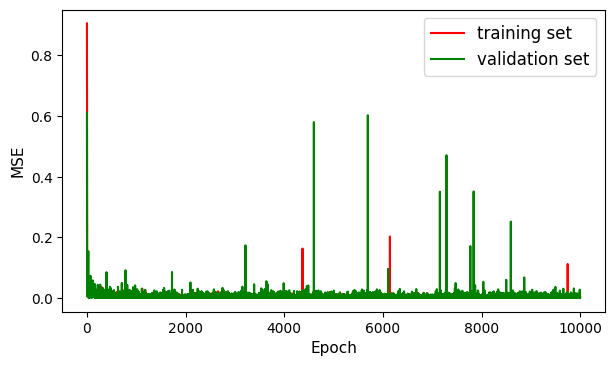

In [16]:
plt.figure(figsize=(7, 4), dpi=100)

plt.plot(model2_train.history['loss'], color='r', )
plt.plot(model2_train.history['val_loss'], color='g')

plt.ylabel('MSE', fontsize=11)
plt.xlabel('Epoch', fontsize=11)
plt.legend(['training set', 'validation set'], loc='upper right', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
# plt.title('FFNN+MC-DO', fontsize=8)

plt.savefig('loss_dropoutJLA2.png')

In [8]:
file3 = '/home/isidro/Documents/gitHub/misRepos/neuralCosmoReconstruction/notebooks/fake_binned_JLA.dat'
data3 = pd.read_csv(file3, names=['z', '$D_L$'], sep = " ", skiprows=3)

x_test = data.values[:,0]
# dl = data.values[:,1:][shuffle]
np.shape(x_test)

(31,)

In [9]:
test_batch_size = 31
# x_test = np.random.uniform(np.min(z), np.max(z), test_batch_size)
# x_test = np.linspace(np.min(z), np.max(z), test_batch_size)

mc_dropout_num = 100# Run Dropout 100 times
predictions = np.zeros((mc_dropout_num, test_batch_size, 1))
uncertainty = np.zeros((mc_dropout_num, test_batch_size, 1))
for i in range(mc_dropout_num):
    predictions[i] = neural_model2.predict(x_test)
    

# get mean results and its varience
prediction_mc_dropout = np.mean(predictions, axis=0, dtype=np.float64)
std_mc_dropout = np.std(predictions, axis=0, dtype=np.float64)



In [10]:
Om = 0.27
# variance network
w0 = -1

# def RHSquared_a_lcdm(a):
# #         return Ezlcdm(a)**2
#     return Om*(1/a)**3 + 1 - Om

def RHSquared_a_owacdm(a, w0, wa):
#         return Ezlcdm(a)**2
    rhow = a**(-3*(1.0+w0+wa))*np.exp(-3*wa*(1-a))
    return (Om/a**3+(1.0-Om)*rhow)

def DistIntegrand_a(a, w0, wa):
#         if model == 'lcdm':
#             return 1./np.sqrt(RHSquared_a_lcdm(a))/a**2
#         elif model == 'owacdm':
        return 1./np.sqrt(RHSquared_a_owacdm(a, w0, wa))/a**2
    
def Da_z(z, w0, wa):
        # r=intg.quad(self.Hinv_z,0,z)
        # this version seems to be faster
        r = intg.quad(DistIntegrand_a, 1./(1+z), 1, args=(w0, wa))

        r = r[0]
      
        return r
    
def distance_modulus(z, w0=-1, wa=0.0):
        # I think this should also work with varyPrefactor as long as BAO is there too
        # assert(not self.varyPrefactor)

        # note that our Da_z is comoving, so we're only
        # multilpyting with a single (1+z) factor
#         return 5*np.log10(Da_z(z, model, w0, wa)*(1+z)) 
    return 5*np.log10(Da_z(z, w0, wa)*(1+z))+43



In [11]:
zmodel = np.linspace(0.01, 1.5, 100)
flcdm = []
fowacdm1 = []
# fowacdm2 = []
# fowacdm3 = []

# flcdm = []
for zzz in zmodel:
    flcdm.append(distance_modulus(zzz, w0=-1, wa=0))
#     fowacdm1.append(distance_modulus(zzz, w0=-1.3, wa=1.2))
    fowacdm1.append(distance_modulus(zzz, w0=-10, wa=-100))
#     fowacdm2.append(distance_modulus(zz, model='owacdm', w0=-1, wa=-0.5))
#     fowacdm3.append(distance_modulus(zz, model='owacdm', w0=-1, wa=0.0))
    
flcdm = np.array(flcdm)
fowacdm1 = np.array(fowacdm1)
# fowacdm2 = np.array(fowacdm2)
# fowacdm3 = np.array(fowacdm3)

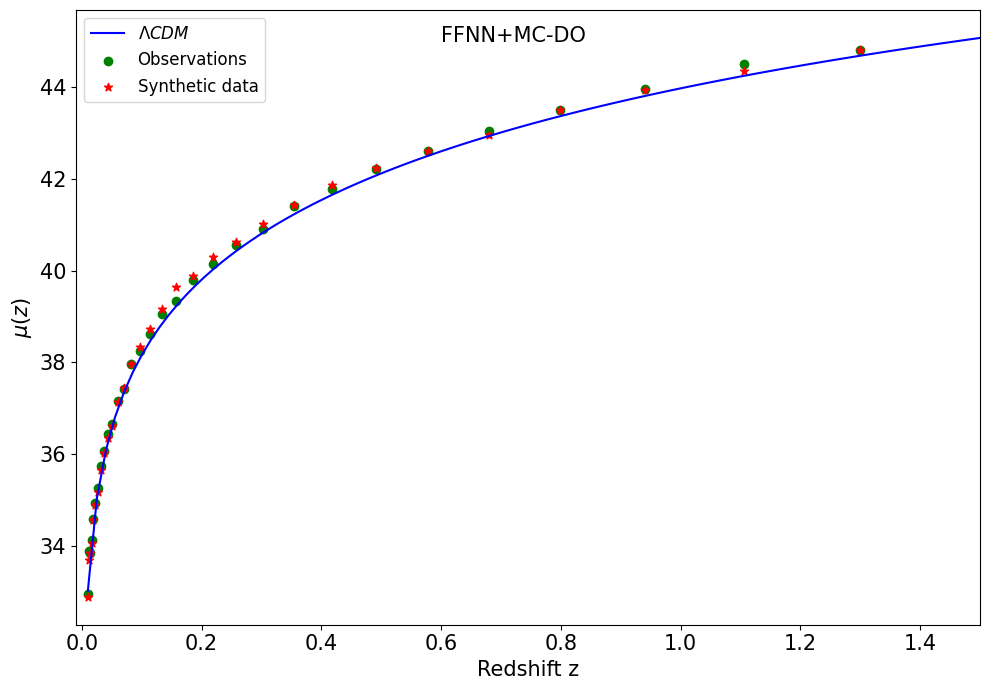

In [19]:
# Plotting
dlfake = scalerdl.inverse_transform(prediction_mc_dropout.reshape(-1,1))
plt.figure(figsize=(10, 7), dpi=100)

# fakeerrors = np.sqrt(np.abs(np.diagonal(decoded_fake.reshape(31,31))))
# sigma = np.sqrt(std_mc_dropout.reshape(31,))

plt.scatter(z, dl, c='g', label='Observations')
# plt.errorbar(z, dl, errors, fmt='g.', markersize=10, label='Observations')
plt.scatter(x_test, dlfake, marker='*', c='r', label='Synthetic data')

# plt.errorbar(x_test, dlfake, yerr=sigma
#              , markersize=10, fmt='.', 
#              ecolor='blue', capthick=2, elinewidth=0.9, alpha=0.8, c='r',
#              label='Synthetic data')

# plt.scatter(scalerz.inverse_transform(zz), yy, color='k', label='Original cosmic chronometers')
plt.plot(zmodel, flcdm, label='$\Lambda CDM$', c='b')
# plt.plot(zmodel, fowacdm1, label='CPL $w_0 = -1.3, w_a=1.2$', c='m')
# plt.plot(zmodel, fowacdm2, label='$\omega_0\omega_aCDM \;\; \omega_a=-0.5$', c='y')
# plt.plot(zmodel, Hlcdm(zmodel), label='$\Lambda CDM$ $H_0 = 73.24$', c='k')
# plt.plot(zmodel, Hlcdm(zmodel, H0=67.4), label='$\Lambda CDM$ $H_0 = 67.4$', c='b')
plt.xlim(-0.01, np.max(z)+0.2)
plt.xlabel("Redshift z", fontsize=15)
plt.ylabel("$\mu(z)$", fontsize=15)
# plt.xlim(0, np.max(z))
plt.xticks(fontsize=15)
plt.text(0.6, 45, 'FFNN+MC-DO', fontsize=15)
plt.yticks(fontsize=15)
plt.tight_layout()

plt.legend(loc='upper left', fontsize=12)
# plt.show()
plt.savefig('DL_dropoutb2.png')

In [13]:
index = np.argsort(x_test)
fake_data2 = np.stack((x_test[index], dlfake.reshape(31,)[index]), axis=1)


# np.savetxt("fake_binned_JLADO.dat",  fake_data2, delimiter= " ", header="#fake data\n# z\n# mu", fmt='%1.9f')


In [14]:
# autoencoder.save('autoencoderJLA_DO.h5')
# decoder.save('decoderJLA_DO.h5')
# neural_model2.save('FFNN_JLA_DO.h5')
# encoder.save('encoderJLA_DO.h5')

In [15]:
# plt.figure(figsize=(5, 3), dpi=100)
# plt.plot(model_train.history['loss'], color='r', )
# plt.plot(model_train.history['val_loss'], color='g')
# plt.ylabel('MSE', fontsize=9)
# plt.xlabel('Epoch', fontsize=9)
# plt.legend(['training set', 'validation set'], loc='upper right', fontsize=8)
# plt.xticks(fontsize=7)
# plt.yticks(fontsize=7)
# plt.title('FFNN', fontsize=8)
# plt.savefig("loss_hz.png", dpi=100)